# <font color = Orange > <center>     Fire Incidents



### This data represents all Fire Department incidents responded to by the Town of Cary.




> ##### It contains five complete calendar years, plus the current year.  The dataset only contains calls that have been completed and reviewed.  As a result, incident reports may take 1 - 5 business days to complete, based on the complexity of the call

---

<center> <img src = https://pbs.twimg.com/media/Dej4dJgW4AEYNli.jpg>




Link to Dataset : https://catalog.data.gov/dataset/fire-incidents-eb549

# <font color = Orange > <center>     Step 1 : Downloading The Dataset



###  




> ##### Dataset is downloaded from the data.gov link
---






Link to Dataset : https://catalog.data.gov/dataset/fire-incidents-eb549

In [ ]:
!wget -O 'dataset.csv' 'https://data.townofcary.org/api/v2/catalog/datasets/fire-incidents/exports/csv' 

--2021-09-22 21:02:55--  https://data.townofcary.org/api/v2/catalog/datasets/fire-incidents/exports/csv
Resolving data.townofcary.org (data.townofcary.org)... 52.1.105.32, 34.196.27.91
Connecting to data.townofcary.org (data.townofcary.org)|52.1.105.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘dataset.csv’

dataset.csv             [             <=>    ]   8.61M   279KB/s    in 33s     

2021-09-22 21:03:28 (268 KB/s) - ‘dataset.csv’ saved [9027799]



In [ ]:
!wget  -O 'GeoData.csv' 'https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'

--2021-09-22 21:03:29--  https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json
Resolving eric.clst.org (eric.clst.org)... 69.163.226.135
Connecting to eric.clst.org (eric.clst.org)|69.163.226.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2552566 (2.4M) [application/json]
Saving to: ‘GeoData.csv’

GeoData.csv         100%[===================>]   2.43M  4.75MB/s    in 0.5s    

2021-09-22 21:03:29 (4.75 MB/s) - ‘GeoData.csv’ saved [2552566/2552566]



# <font color = Orange > <center>     Step 2 : Importing Needed Packages 



###  




> ##### Packages is imported in this step to be used in the whole notebook
---







In [ ]:
! pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 40.4 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [ ]:
! pip  install pywaffle

     |████████████████████████████████| 526 kB 5.2 MB/s 


In [ ]:
'''
Importing Packages
'''
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import geopandas
from shapely.geometry import Point
from pywaffle import Waffle
%matplotlib inline 

# <font color = Orange > <center>     Step 3 : Reading The Dataset(s) needed 


###  




> ##### Dataset(s) is read to be further processed 
---







In [ ]:
# Reading dataset using pandas 
dataset = pd.read_csv('/content/drive/MyDrive/Datasets_for_ibm/fire-incidents.csv',sep=';' , dtype={'station': str})

In [ ]:
#  Showing / Viewing dataset 
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,"35.801883, -78.895481"
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,"35.757833, -78.731762"
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,"35.824521, -78.876081"
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,"35.778379, -78.785899"
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,"35.715518, -78.755813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,"35.78086, -78.762233"
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,"35.668363, -78.750872"
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,"35.862263, -78.90039"
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,"35.865377, -78.814964"


In [ ]:
# Getting Info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50376 entries, 0 to 50375
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   alarmtime         50376 non-null  object 
 1   year              50376 non-null  int64  
 2   incidentnum       50376 non-null  object 
 3   exp_no            50376 non-null  int64  
 4   incidentcode      50376 non-null  int64  
 5   incitypedesc      50376 non-null  object 
 6   indicentdesc      50290 non-null  object 
 7   majorcategory     50376 non-null  object 
 8   streetaddress     50375 non-null  object 
 9   mutl_aid          50376 non-null  object 
 10  station           50363 non-null  object 
 11  shift             50376 non-null  object 
 12  current_district  50333 non-null  object 
 13  current_fmz       50333 non-null  object 
 14  latitude          50353 non-null  float64
 15  longitude         50353 non-null  float64
 16  geopoint          50353 non-null  object

# <font color = Orange > <center>     Step 4 : Data Cleaning 



###  




> ##### Focus on removing inaccurate data  dataset 
---








In [ ]:
# Checking for Nan (Missing) values in dataset
dataset.isna().sum()

alarmtime            0
year                 0
incidentnum          0
exp_no               0
incidentcode         0
incitypedesc         0
indicentdesc        86
majorcategory        0
streetaddress        1
mutl_aid             0
station             13
shift                0
current_district    43
current_fmz         43
latitude            23
longitude           23
geopoint            23
dtype: int64



>  As seen from above cell we have 8 columns (features) with missing values this values is between 
<font color = Orange > 86 <font color = black >Missing values to <font color = Orange > 13.

> Some Solution can be Processed against this missing values however since we have small number of missing data we can just <font color = orange > neglect it.

>  One of the Reasons we just neglect the missing data here rather than further processing it is that missed data have <font color = orange > String<font color = black > data type which make it hard to guess the missed value or getting it from other complete rows in the dataset








In [ ]:
'''
Getting columns with Nan Values and Counting the number of missed values and Data type of column
'''
indecies_null = [i for i,n in enumerate(dataset.isna().sum() > 0) if n ]
Non_null_keys = [dataset.isna().sum().keys()[i] for i in indecies_null]
Non_null_values = [dataset.isna().sum()[i] for i in indecies_null]
dataset.dtypes[Non_null_keys]
pd.DataFrame([ Non_null_keys ,  Non_null_values , dataset.dtypes[Non_null_keys]
               
] ).T.set_axis(["Column", "Nan Value" , 'Type'], axis=1)

,Column,Nan Value,Type
0,indicentdesc,86,object
1,streetaddress,1,object
2,station,13,object
3,current_district,43,object
4,current_fmz,43,object
5,latitude,23,float64
6,longitude,23,float64
7,geopoint,23,object


In [ ]:
'''
Checking Number of dropped rows 
'''
loss_in_data = dataset.shape[0] - dataset.dropna().shape[0]
loss_in_data

142



> An interesting Fact here is that the missing values from different columns does intersect , in other words some rows might have multiple missed values which make the loss only <font color = 'Orange'> 142 <font color = 'black'>  row  rather than the sum of all missing values in all columns 



In [ ]:
'''
Droping missing data
'''
dataset.dropna(inplace=True)

# <font color = Orange > <center>     Step 5 : Data Wrangling 



###  




> ##### Focuses on transforming the data's format, typically by converting “raw” data into another format more suitable for use
---






Link to Dataset : https://catalog.data.gov/dataset/fire-incidents-eb549

Before Wrangling : 

> One of the most challenging problems in data exploration is data wrangling and putting the data in a form that is <font color = 'orange'> suitable form (shape).

> In upcoming cells , Let's go one by one through the columns and try putting them in <font color = 'orange'> most suitable <font color = 'black'> format. 



In [ ]:
#  Showing / Viewing dataset 
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,"35.801883, -78.895481"
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,"35.757833, -78.731762"
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,"35.824521, -78.876081"
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,"35.778379, -78.785899"
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,"35.715518, -78.755813"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,"35.78086, -78.762233"
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,"35.668363, -78.750872"
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,"35.862263, -78.90039"
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,"35.865377, -78.814964"




> Lets Start with  
```
alarmtime
```
column



> This column has many information in one string so let's split it into dedicatied time and date columns 








In [ ]:
'''
This Function Split the Date and Time into 2 dedicated columns (features)
'''
def split_time_date(date_Time) :
  return  date_Time.split('T') 

In [ ]:
'''
Applying the split_time_date function on alarmtime column
'''
dates = [Date for Date,Time in dataset['alarmtime'].apply(split_time_date)]
Time = [Time for Date,Time in dataset['alarmtime'].apply(split_time_date)]



> To Make it easier to feature engineer this part let's create a <font color = 'Orange'>dedicated DataFrame <font color = 'Black'> for it. 



In [ ]:
# Create a dataframe for Date and Time
Date_Time_df = pd.DataFrame(
    [dates , Time ]
).T.set_axis(["Date", "Time" ], axis=1)


In [ ]:
#  Showing / Viewing dataset 
Date_Time_df

,Date,Time
0,2018-03-26,12:04:37+00:00
1,2018-03-26,10:30:47+00:00
2,2018-03-26,09:13:04+00:00
3,2018-03-25,20:45:33+00:00
4,2018-03-25,04:29:19+00:00
...,...,...
50229,2016-01-01,14:43:33+00:00
50230,2016-01-01,09:38:19+00:00
50231,2016-01-01,09:32:04+00:00
50232,2016-01-01,02:38:34+00:00




> Lets Continue with  
```
Date
```
column



> This column has many information in one string so let's split it into <font Color = 'Orange '>dedicatied Years , Months and Days columns. 








In [ ]:
'''
Create dedicatied Years , Months and Days columns
'''
Date_Time_df['Years'] = [year for year , month , day in  Date_Time_df['Date'].apply(lambda x:x.split('-'))]
Date_Time_df['Months'] = [month for year , month , day in Date_Time_df['Date'].apply(lambda x:x.split('-'))]
Date_Time_df['Days'] = [day for year , month , day in Date_Time_df['Date'].apply(lambda x:x.split('-'))]



In [ ]:
#  Showing / Viewing dataset 
Date_Time_df

,Date,Time,Years,Months,Days
0,2018-03-26,12:04:37+00:00,2018,03,26
1,2018-03-26,10:30:47+00:00,2018,03,26
2,2018-03-26,09:13:04+00:00,2018,03,26
3,2018-03-25,20:45:33+00:00,2018,03,25
4,2018-03-25,04:29:19+00:00,2018,03,25
...,...,...,...,...,...
50229,2016-01-01,14:43:33+00:00,2016,01,01
50230,2016-01-01,09:38:19+00:00,2016,01,01
50231,2016-01-01,09:32:04+00:00,2016,01,01
50232,2016-01-01,02:38:34+00:00,2016,01,01




> Switching to  
```
Time
```
column



> This column also has many information in one string so let's split it into <font Color = 'Orange '>dedicatied Hour  and Minutes columns. 





> Before doning this , It is noticed that Time column have some timezone related text '+ 00:00' let's check if dealing with different zones or only one timezone






In [ ]:
'''
Check if timezones in Time column is different or similar 
'''
zones= [zone for Time,zone in Date_Time_df['Time'].apply(lambda x:x.split('+'))]
zones = pd.Series(zones)
zones.unique()

array(['00:00'], dtype=object)



> It is noticed that we have only one timezone so we can <font color = 'Orange'> neglect <font color = 'Black'>  it.



In [ ]:
# Neglecting Timezone in Time Column 
Date_Time_df['Time'] = [Time for Time,_ in Date_Time_df['Time'].apply(lambda x:x.split('+'))]

In [ ]:
#  Showing / Viewing dataset 
Date_Time_df

,Date,Time,Years,Months,Days
0,2018-03-26,12:04:37,2018,03,26
1,2018-03-26,10:30:47,2018,03,26
2,2018-03-26,09:13:04,2018,03,26
3,2018-03-25,20:45:33,2018,03,25
4,2018-03-25,04:29:19,2018,03,25
...,...,...,...,...,...
50229,2016-01-01,14:43:33,2016,01,01
50230,2016-01-01,09:38:19,2016,01,01
50231,2016-01-01,09:32:04,2016,01,01
50232,2016-01-01,02:38:34,2016,01,01


In [ ]:
'''
Creating Dedicated Hour and Minute Columns 
'''

Date_Time_df['Hour'] = [ hour for hour ,minute ,second in Date_Time_df['Time'].apply(lambda x:x.split(':'))]
Date_Time_df['Minute'] = [ minute for hour ,minute ,second in Date_Time_df['Time'].apply(lambda x:x.split(':'))]





> Seconds Column could be extracted as hour and minute columns however seconds is not as <font color = 'Orange'>important and informative <font color = 'Black'> to be considedred in this analysis.



In [ ]:
#  Showing / Viewing dataset 
Date_Time_df

,Date,Time,Years,Months,Days,Hour,Minute
0,2018-03-26,12:04:37,2018,03,26,12,04
1,2018-03-26,10:30:47,2018,03,26,10,30
2,2018-03-26,09:13:04,2018,03,26,09,13
3,2018-03-25,20:45:33,2018,03,25,20,45
4,2018-03-25,04:29:19,2018,03,25,04,29
...,...,...,...,...,...,...,...
50229,2016-01-01,14:43:33,2016,01,01,14,43
50230,2016-01-01,09:38:19,2016,01,01,09,38
50231,2016-01-01,09:32:04,2016,01,01,09,32
50232,2016-01-01,02:38:34,2016,01,01,02,38




> To ensure that columns was created properly let's do some trivial tests : 


1.   Check if we have <font color = 'Orange'>24 unique value only in Hour column representing the <font color = 'Orange'> 24 hours in the day <font color = 'Black'>
2.   Check if we have <font color = 'Orange'>60 unique value only in Minutes column representing the <font color = 'Orange'> 60 minutes in one hour <font color = 'Black'>





In [ ]:
# Check number of uniuqe values in hour column
len(Date_Time_df['Hour'].unique())

24

In [ ]:
'''
Check and Print number of uniuqe values in hour column
'''
date_sorted= Date_Time_df['Hour'].unique().tolist()
date_sorted.sort()
date_sorted


['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [ ]:
# Check number of uniuqe values in Minute column
len(Date_Time_df['Minute'].unique())

60

In [ ]:
'''
Check and Print number of uniuqe values in Minute column
'''
minute_sorted= Date_Time_df['Minute'].unique().tolist()
minute_sorted.sort()
minute_sorted


['00',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59']



> Switching to  
```
Months
```
column



> This column can be grouped to have 4 different values which is <font color = 'Orange'> Quarters of year (Q1,Q2,Q3,Q4).





> Doing this can bring us a deeper informative findings in further analysis to be done. 





In [ ]:
# Creating Quarters column
Date_Time_df['Quarters'] =  Date_Time_df['Months'].apply( lambda x : 'Q ' + str( int (int(x.replace('0', ''))/4)+1)
  )

In [ ]:
#  Showing / Viewing dataset 
Date_Time_df

,Date,Time,Years,Months,Days,Hour,Minute,Quarters
0,2018-03-26,12:04:37,2018,03,26,12,04,Q 1
1,2018-03-26,10:30:47,2018,03,26,10,30,Q 1
2,2018-03-26,09:13:04,2018,03,26,09,13,Q 1
3,2018-03-25,20:45:33,2018,03,25,20,45,Q 1
4,2018-03-25,04:29:19,2018,03,25,04,29,Q 1
...,...,...,...,...,...,...,...,...
50229,2016-01-01,14:43:33,2016,01,01,14,43,Q 1
50230,2016-01-01,09:38:19,2016,01,01,09,38,Q 1
50231,2016-01-01,09:32:04,2016,01,01,09,32,Q 1
50232,2016-01-01,02:38:34,2016,01,01,02,38,Q 1




> To Check if quarters column was created validly we can chcek for its unique values which must be (Q1-4)



In [ ]:
 Date_Time_df['Quarters'].unique()

array(['Q 1', 'Q 4', 'Q 3', 'Q 2'], dtype=object)



> OK Now returning again to  
```
Months
```
column



> This step of creating a column to include the name of each month insted of just its number is made for purposes of <font color = 'Orange'>visualization which will be made in upcoming steps.





In [ ]:
'''
Create column for months names
'''
import datetime 
Date_Time_df['Months Names'] =  Date_Time_df['Months'].apply(lambda x :
                                                             datetime.date(1900, int(x.replace('0', '')), 1).strftime('%B')
                                                             )


>Now to test previously made columns let's check for columns Quarters, Months Names if month is 11 

In [ ]:
#  Testing / Showing / Viewing dataset 
Date_Time_df[Date_Time_df['Months']=='11']

,Date,Time,Years,Months,Days,Hour,Minute,Quarters,Months Names
611,2017-11-30,23:00:49,2017,11,30,23,00,Q 3,November
612,2017-11-30,19:12:22,2017,11,30,19,12,Q 3,November
613,2017-11-30,12:44:56,2017,11,30,12,44,Q 3,November
614,2017-11-30,08:03:23,2017,11,30,08,03,Q 3,November
615,2017-11-30,05:01:44,2017,11,30,05,01,Q 3,November
...,...,...,...,...,...,...,...,...,...
48656,2016-11-02,07:15:40,2016,11,02,07,15,Q 3,November
48657,2016-11-01,20:17:01,2016,11,01,20,17,Q 3,November
48658,2016-11-01,12:47:50,2016,11,01,12,47,Q 3,November
48659,2016-11-01,11:55:22,2016,11,01,11,55,Q 3,November




> Returning once more to   
```
Months
```
column



> This column can be grouped to have 4 different values which is <font color = 'Orange'> Seasons of year (Spring,Fall,Winter,Summer).





> Doing this can bring us a deeper informative findings in further analysis to be done. 





In [ ]:
'''
Function given month return valid season
'''
def season(month):
    if (month == 12 or 1 <= month <= 4):
        return "Winter"   
    elif (4 <= month <= 5):
        return "Spring" 
    elif (6 <= month <= 9):
        return "Summer"
    else:
        return "Fall"

In [ ]:
# Applying season function to create Season column
Date_Time_df['Season'] = Date_Time_df['Months'].apply(lambda x : int(x)).apply(season)

>Now to test Season column let's check for unique values in it which should be the <font color = 'Orange'>4 Seasons of year. 

In [ ]:
# Check number of unique values in Season column 
Date_Time_df['Season'].unique()

array(['Winter', 'Fall', 'Summer', 'Spring'], dtype=object)



> Switching to  
```
incidentcode
```
column



> This column contain information about incident codes which can be   <font Color = 'Orange '>grouped Together. 





> Grouping these incident codes creates new informative column that can be used in analysis.

>  <font Color = 'Orange' > I included some of famous incident type codes below :  


<img src = https://www.responserack.com/images/NFIRS-Incident-Types-Cheat-Sheet.png >





In [ ]:
# Check Dataset shape 
dataset.shape

(50234, 17)



> According to my research I could not found incident codes that are in thousands while some thousand values appears in this dataset code incident column.

> I will solve this problem by marking these rows as <font color = 'Orange'>other <font color = 'Black'>in incident code grouping.



In [ ]:
# Checking number of rows with incidentcode > 999 
len(dataset[dataset['incidentcode'] > 999])

1861

In [ ]:
'''
Function recieves code as input and return it code group
'''
def getCodes(code) : 
  if code > 999 : 
    return 'other'
  else : 
    return str(code)[:1]+'00'

In [ ]:
# Applying getCodes function to create new column incidentcodeGroups
dataset['incidentcodeGroups'] = dataset['incidentcode'].apply(getCodes)

In [ ]:
#  Testing / Showing / Viewing dataset 
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint,incidentcodeGroups
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,"35.801883, -78.895481",600
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,"35.757833, -78.731762",300
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,"35.824521, -78.876081",300
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,"35.778379, -78.785899",700
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,"35.715518, -78.755813",300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,"35.78086, -78.762233",300
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,"35.668363, -78.750872",700
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,"35.862263, -78.90039",300
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,"35.865377, -78.814964",500


> Switching to  
```
latitude	
longitude	
geopoint
```
columns



> These points can be used with <font color = 'Orange'>geopandas to create points on maps<font color = 'Black'> which is going to be huge plus for such analysis

> It is noticed that geopoint need to <font color = 'Orange'> be modified <font color = 'Black'>to be suitable when using geopandas 




In [ ]:
# Creating a list with two numbers of latitude ,longitude swapped in a list
dataset['geopoint'] = [[float(y) , float(x)] for x, y in dataset['geopoint'].apply(
    lambda x:x.split(','))]

In [ ]:
# Applying Point function to geopoints 
dataset['geopoint'] = dataset['geopoint'].apply(Point)

In [ ]:
#  Testing / Showing / Viewing dataset 
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint,incidentcodeGroups
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,POINT (-78.895481 35.801883),600
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,POINT (-78.731762 35.757833),300
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,POINT (-78.876081 35.824521),300
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,POINT (-78.785899 35.778379),700
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,POINT (-78.755813 35.715518),300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,POINT (-78.76223299999999 35.78086),300
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,POINT (-78.750872 35.668363),700
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,POINT (-78.90039 35.862263),300
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,POINT (-78.814964 35.865377),500


In [ ]:
'''
Create new dataframe compatible with geopandas
'''
dataset_x = dataset.copy(deep = True)
dataset_x = geopandas.GeoDataFrame(dataset_x, geometry='geopoint')

In [ ]:
#  Testing / Showing / Viewing dataset 
dataset 

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint,incidentcodeGroups
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,POINT (-78.895481 35.801883),600
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,POINT (-78.731762 35.757833),300
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,POINT (-78.876081 35.824521),300
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,POINT (-78.785899 35.778379),700
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,POINT (-78.755813 35.715518),300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,POINT (-78.76223299999999 35.78086),300
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,POINT (-78.750872 35.668363),700
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,POINT (-78.90039 35.862263),300
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,POINT (-78.814964 35.865377),500


# <font color = Orange > <center>     Step 5 : Data Visualization and exploration 



###  




> ##### Focus on getting insights from data 
---






Link to Dataset : https://catalog.data.gov/dataset/fire-incidents-eb549

### Creating map 


> Since these data is supporrted with 


```
latitude    
longitude  
```
columns 

> A <font color = 'Orange'>Map with the positions of fires pointed can be created. 

> US States Map can be used , I used the following one : [US States Maps](https://eric.clst.org/tech/usgeojson/)




In [ ]:
'''
Load US GeoJson
'''
country = geopandas.read_file('/content/GeoData.csv')
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."




> Since <font color = 'Orange'>Town of Cary is located in North Carolina we can use only the portion of North Carolina <font color = 'black'>from the full map. 



In [ ]:
# Selecting only North Carolina
COUNTRY = country[country['NAME']=='North Carolina']

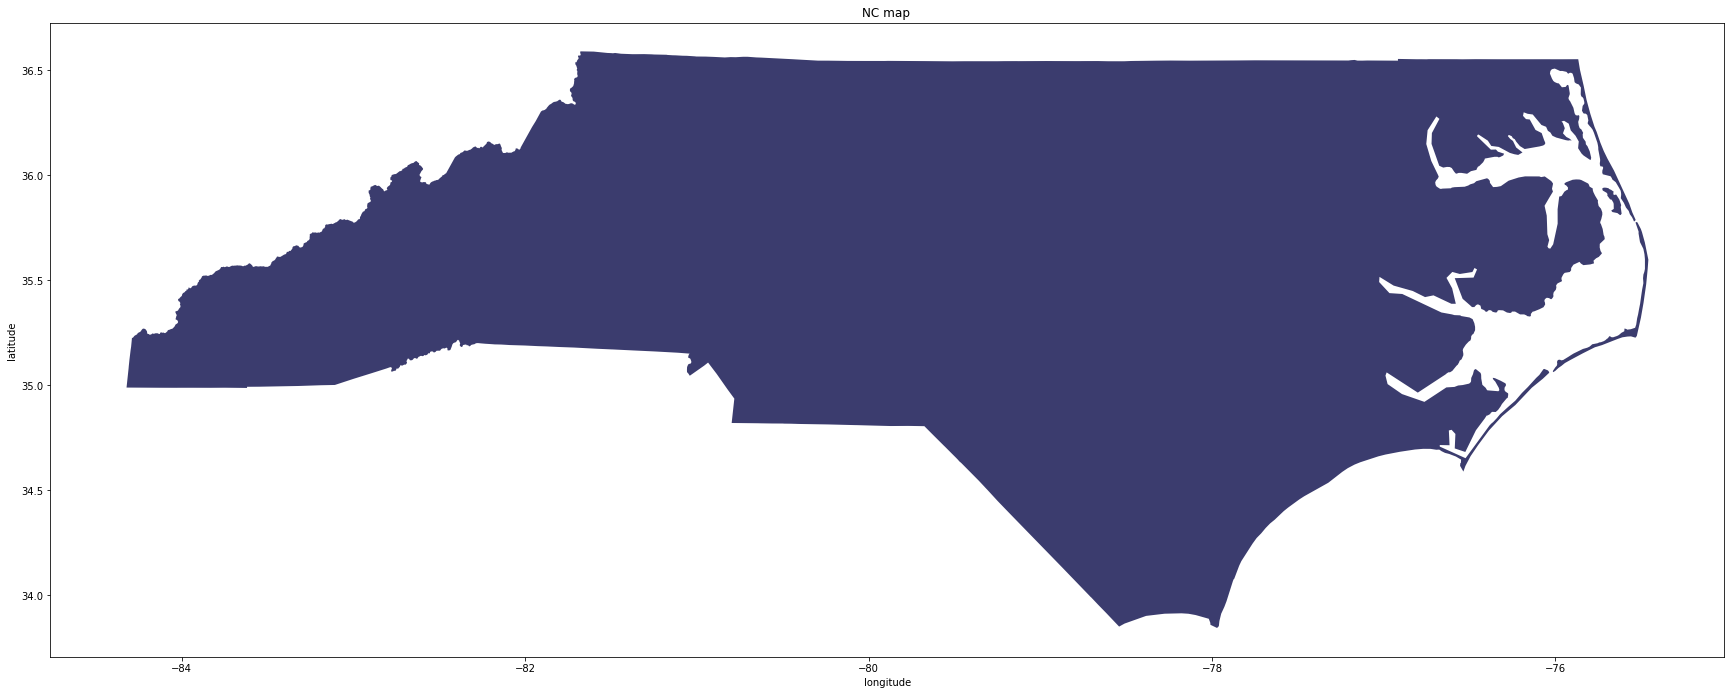

In [ ]:
# Plot the Map of NC 
fig, ax = plt.subplots(1, figsize=(30,20))
base = COUNTRY.plot(ax=ax, color='#3B3C6E') ; 
ax.set(xlabel="longitude", ylabel="latitude") ; 
ax.set_title('NC map ') ; 

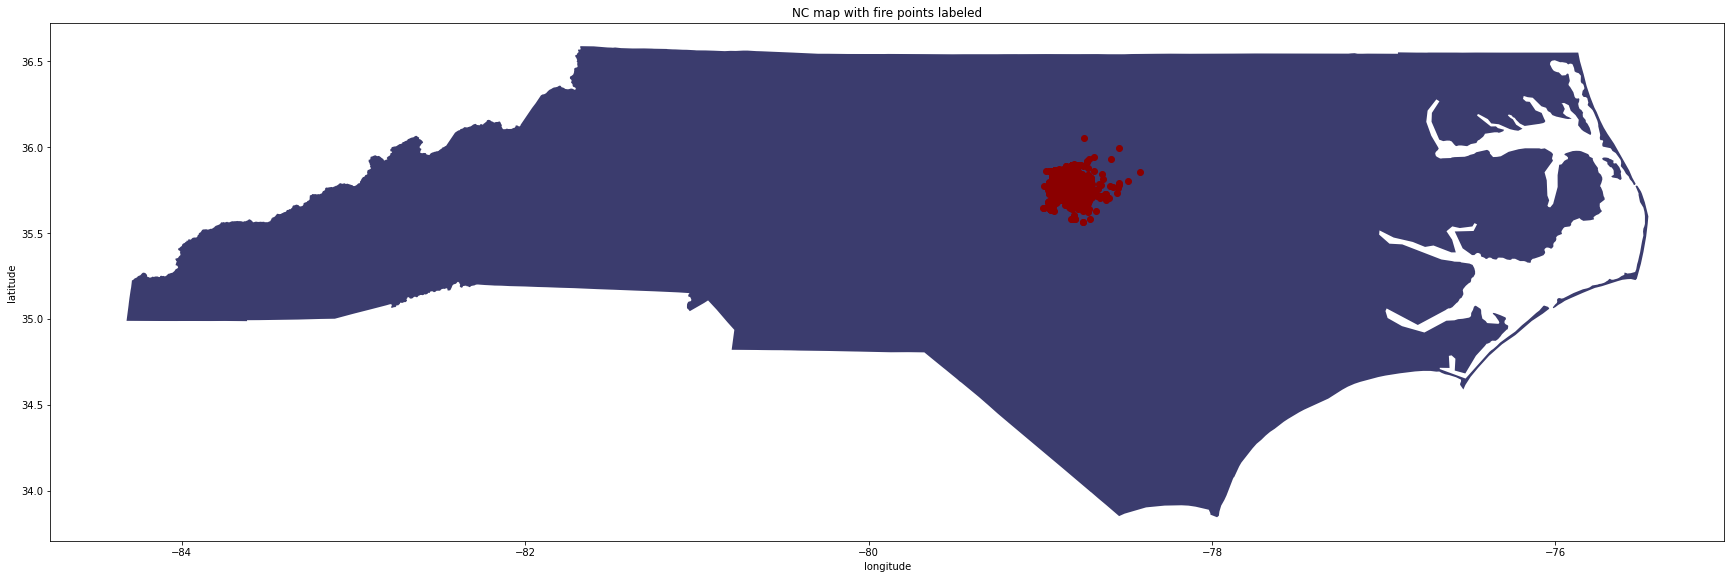

In [ ]:
# plotting the fire positions on top with red color 
fig, ax = plt.subplots(1, figsize=(30,20))
base = COUNTRY.plot(ax=ax, color='#3B3C6E') ; 
dataset_x.plot(ax=base, color='darkred');
ax.set(xlabel="longitude", ylabel="latitude") ; 
ax.set_title('NC map with fire points labeled') ; 




> Let's <font color = 'Orange'>Zoom in <font color = 'Black'> and see the points from near position



Text(0.5, 1.0, 'Zoom level 2')

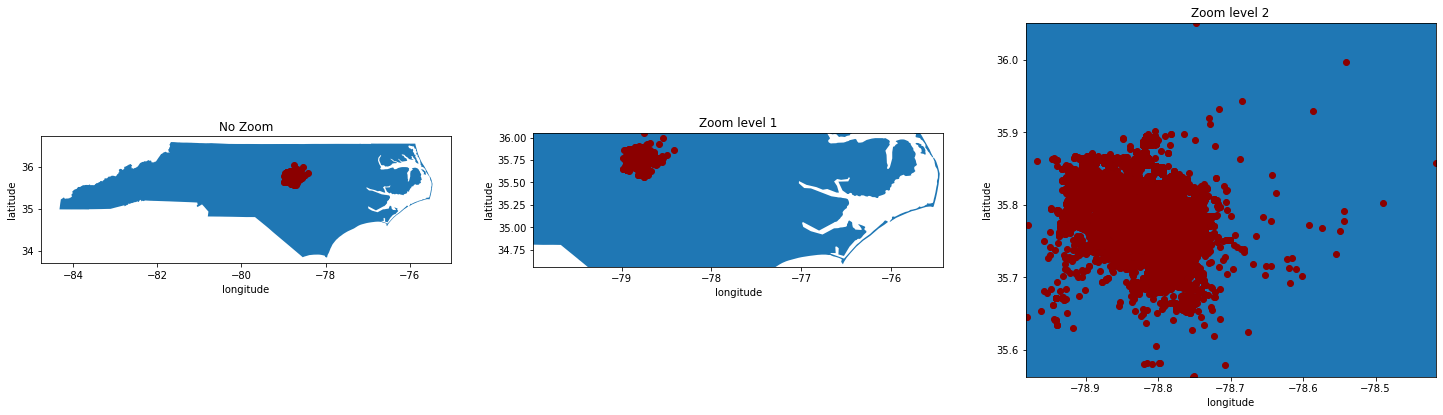

In [ ]:
'''
Create subplots with different Zoom levels to see the points from near positions
'''

_, axes = plt.subplots(1,3, figsize=(25,15))

base = COUNTRY.plot(ax=axes[1]) ; 

base_1 = COUNTRY.plot(ax=axes[0]) ; 
base_2 = COUNTRY.plot(ax=axes[2]) ; 




dataset_x.plot(ax=base_1, color='darkred');

axes[0].set(xlabel="longitude", ylabel="latitude") ; 

dataset_x.plot(ax=base, color='darkred');
axes[1].axis([dataset['longitude'].min() -1 ,dataset['longitude'].max() + 3 , 
              dataset['latitude'].min() - 1,dataset['latitude'].max() ]) ; 

axes[1].set(xlabel="longitude", ylabel="latitude") ; 
dataset_x.plot(ax=base_2, color='darkred');
axes[2].axis([dataset['longitude'].min()  ,dataset['longitude'].max() , 
              dataset['latitude'].min() ,dataset['latitude'].max() ]) ;
axes[2].set(xlabel="longitude", ylabel="latitude") ;

axes[0].set_title('No Zoom')
axes[1].set_title('Zoom level 1')
axes[2].set_title('Zoom level 2')




> Interesting it appears that most dense places on map are on <font color = 'Orange'>latitude (Y-axis) nearly equal 35.8 to 35.9 and on longitude (X-axis) nearly -78.8.


> As we go right on the longitude <font color = 'Orange'> the density increase and then decreases again once more.

> To ensure this finding and make it clear, let's create <font color = 'Orange'>  density and bar graphs.  



### Most common place where fires occurs


> Let's Find what is the most common value in

```
latitude    
longitude  
```
columns 

> Since latitude, longitude columns  have tons of unique values we can use <font color = 'Orange'>density graph and Top Common values bar graph <font color = 'Black'> to clear our idea and come up with our insight. 



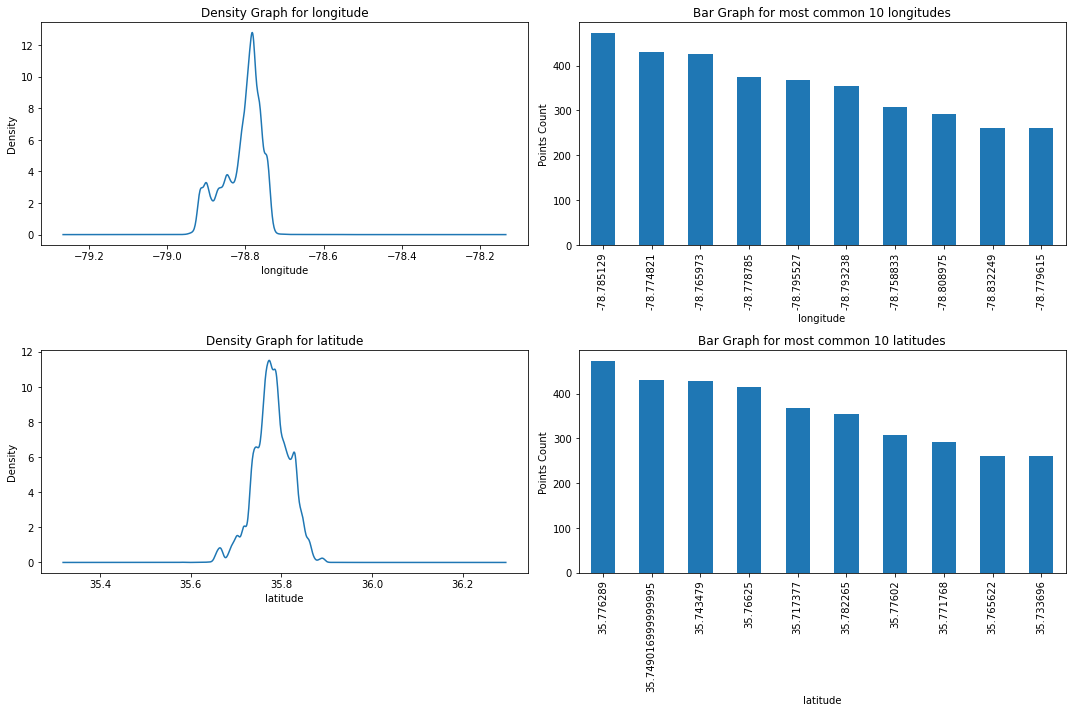

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

dataset_x['longitude'].plot(kind='density', ax = axes[0][0]) ;
dataset_x['longitude'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar' , ax = axes[0][1])
dataset_x['latitude'].plot(kind='density' , ax = axes[1][0]) ; 
dataset_x['latitude'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar',ax = axes[1][1])

axes[0][0].set(xlabel="longitude", ylabel="Density") ;
axes[0][1].set(xlabel="longitude", ylabel="Points Count") ;
axes[1][0].set(xlabel="latitude", ylabel="Density") ;
axes[1][1].set(xlabel="latitude", ylabel="Points Count") ;

axes[0][0].set_title('Density Graph for longitude') ; 
axes[0][1].set_title('Bar Graph for most common 10 longitudes'); 
axes[1][0].set_title('Density Graph for latitude') ;
axes[1][1].set_title('Bar Graph for most common 10 latitudes') ;


plt.tight_layout()

In [ ]:
#  Testing / Showing / Viewing dataset 
print(' Most Common longitude : ' , dataset_x['longitude'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).keys()[0] ,
'\n Most Common latitude :' ,dataset_x['latitude'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).keys()[0])


 Most Common longitude :  -78.785129 
 Most Common latitude : 35.776289




> Interesting it appears that the <font color = 'Orange'>most common longitude and latitude are -78.785, 35.776 nearly also as predicted above.



In [ ]:
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint,incidentcodeGroups
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,POINT (-78.895481 35.801883),600
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,POINT (-78.731762 35.757833),300
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,POINT (-78.876081 35.824521),300
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,POINT (-78.785899 35.778379),700
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,POINT (-78.755813 35.715518),300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,POINT (-78.76223299999999 35.78086),300
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,POINT (-78.750872 35.668363),700
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,POINT (-78.90039 35.862263),300
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,POINT (-78.814964 35.865377),500


### Most Common incident code and code group


> Let's Find what is the most common value in

```
incidentcode    
incidentcodeGroups  
```
columns 

> Since incident code column have tons of unique values we can use <font color = 'Orange'>density graph and Top Common values bar graph <font color = 'Black'> to clear our idea and come up with our insight. 

> Also the Grouping of incident codes done in <font color = 'Orange'> data wrangling step <font color = 'Black'>  is used here to create more consistent image 



In [ ]:
# Number of unique values in incidentcodeGroups column
dataset['incidentcode'].unique().shape[0]

150

In [ ]:
# Values count in incidentcodeGroups column
dataset['incidentcode'].value_counts()

321    16474
311     8970
611     3334
743     2148
745     1687
       ...  
100        1
115        1
811        1
241        1
641        1
Name: incidentcode, Length: 150, dtype: int64

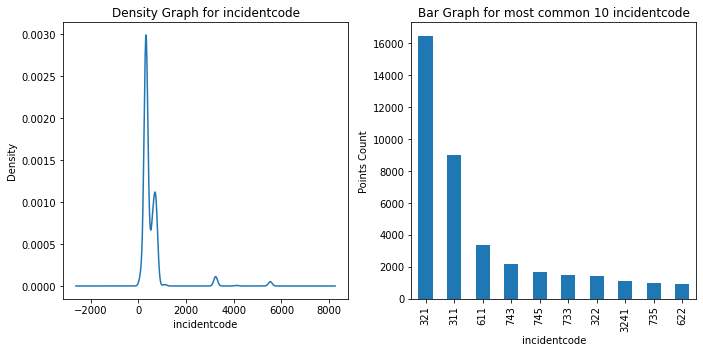

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, axes = plt.subplots(1,2, figsize=(10,5))

dataset['incidentcode'].plot(kind='density', ax = axes[0]) ;
dataset['incidentcode'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar' , ax = axes[1])

axes[0].set(xlabel="incidentcode", ylabel="Density") ;
axes[1].set(xlabel="incidentcode", ylabel="Points Count") ;


axes[0].set_title('Density Graph for incidentcode') ; 
axes[1].set_title('Bar Graph for most common 10 incidentcode'); 



plt.tight_layout()

In [ ]:
# Number of unique values in incidentcodeGroups column
dataset['incidentcodeGroups'].unique().shape[0]

9

In [ ]:
# Top 6 Common values in incidentcodeGroups column
dataset['incidentcodeGroups'].value_counts()[:6]

300      28852
700       8237
600       5737
400       1990
other     1861
500       1806
Name: incidentcodeGroups, dtype: int64

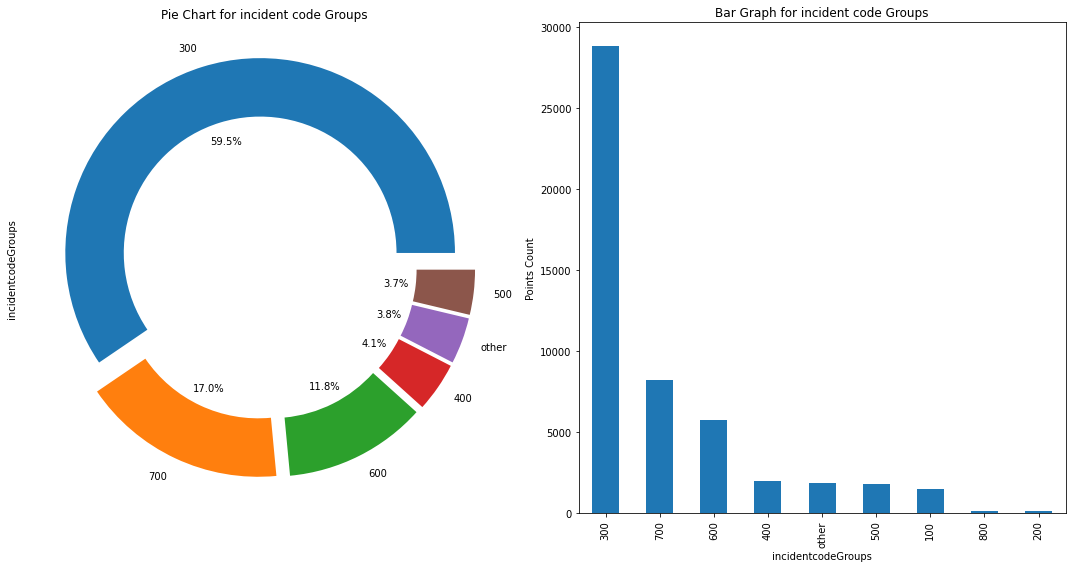

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(1,2, figsize=(15,8))

dataset['incidentcodeGroups'].value_counts()[:6].plot(kind = 'pie' ,ax =axes[0],autopct ='%1.1f%%' ,explode = [0.08]*6, wedgeprops=dict(width=.3) ) ;

dataset['incidentcodeGroups'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1])


axes[1].set(xlabel="incidentcodeGroups", ylabel="Points Count") ;


axes[0].set_title('Pie Chart for incident code Groups') ; 
axes[1].set_title('Bar Graph for incident code Groups'); 



plt.tight_layout()

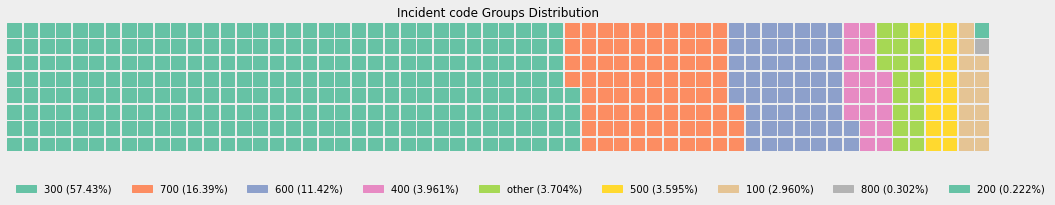

In [ ]:
'''
Create Waffle graphs for incident code Groups
'''
data = dataset['incidentcodeGroups'].value_counts().to_dict()
fig = plt.figure(
    FigureClass=Waffle, 
    figsize = (16,12) ,
    rows=8, 
    columns = 60 , 
    values=data, 
    title={'label': 'Incident code Groups Distribution', 'loc': 'center'},
    labels=["{0} ({1}%)".format(k, str(v/dataset['incidentcodeGroups'].value_counts().sum()*100)[:5]) for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0}
) 
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()



> Another Interesting fact that it appears that the <font color = 'Orange'>most common incident code  is 321 which is medical Calls  followed by 311 and then 611 code.

> <font color = 'Orange'> However when doing grouping of codes it is found that codes 700s is the second most common codes , and our first insight is ensured as 300s codes are the most common ones. 



### Most Common incident description / Type


> Let's Find what is the most common incident type / Description in

```
incitypedesc 
indicentdesc
```
columns

> Since incitypedesc column have alot of unique values we can use <font color = 'Orange'>  line graph in combination with  Top Common values bar graph  <font color = 'Black'> to clear our idea and come up with our insight. 

> indicentdesc column is has far less unique values than incitypedesc which  <font color = 'Orange'> make it easier to use waffle charts and donut ones. 



In [ ]:
# Number of unique values in incitypedesc column
dataset['incitypedesc'].unique().shape[0]

150

In [ ]:
# Values count in incitypedesc column
dataset['incitypedesc'].value_counts()

EMS call, excluding vehicle accident with injury      16474
Medical assist, assist EMS crew                        8970
Dispatched & cancelled en route                        3334
Smoke detector activation, no fire - unintentional     2148
Alarm system activation, no fire - unintentional       1687
                                                      ...  
Toxic condition, Other                                    1
Overpressure rupture of steam boiler                      1
Munitions or bomb explosion (no fire)                     1
Trapped by power lines                                    1
Fire in portable building, fixed location                 1
Name: incitypedesc, Length: 150, dtype: int64

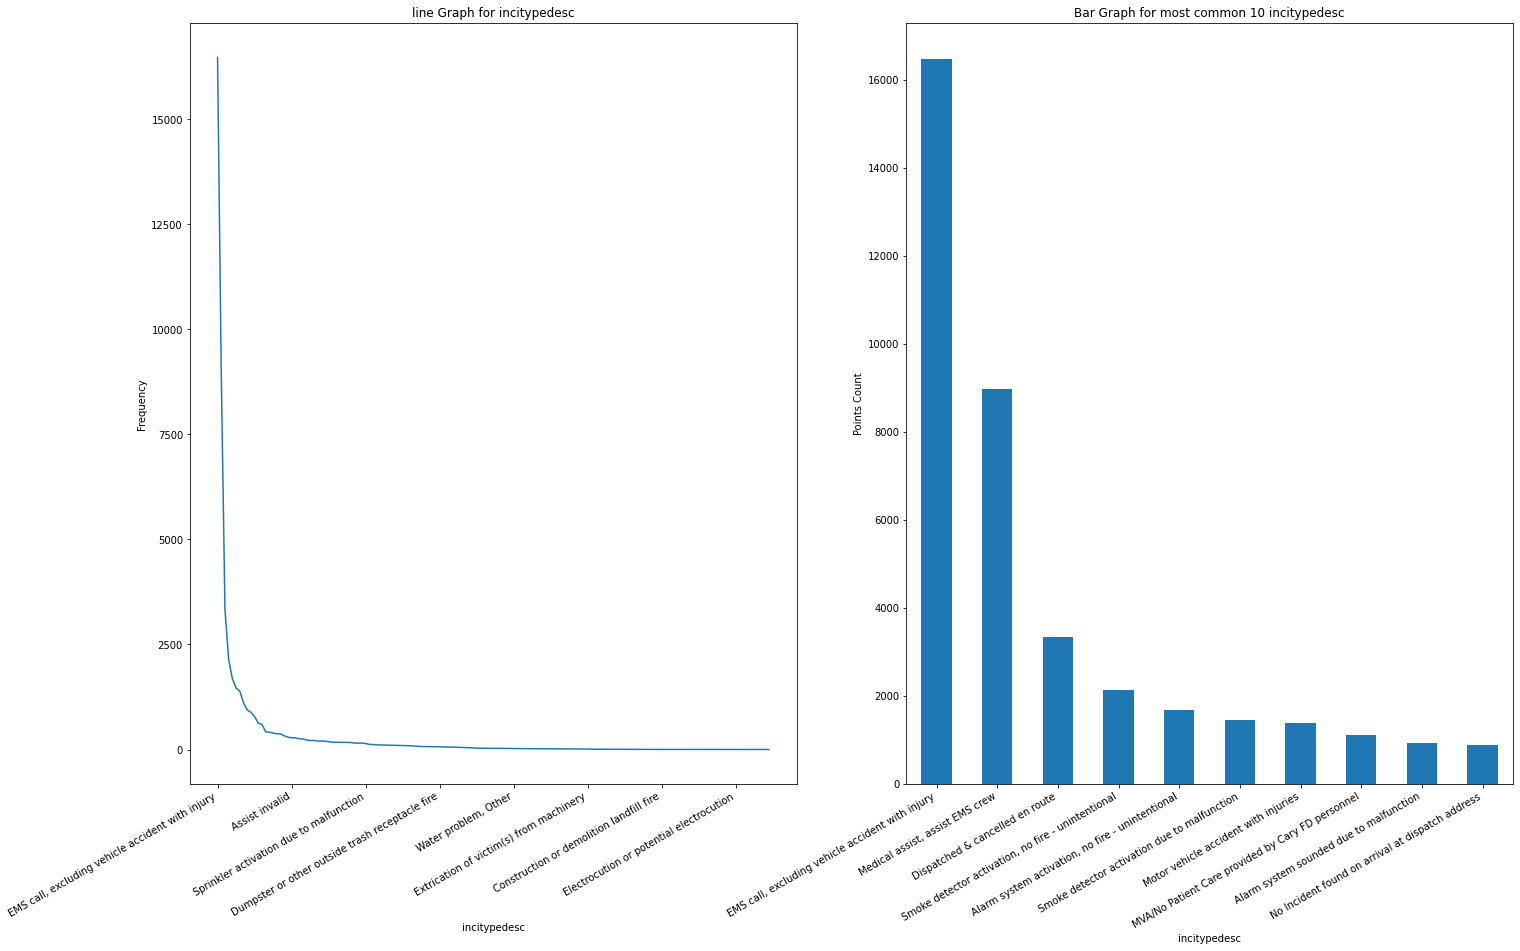

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, axes = plt.subplots(1,2, figsize=(20,15))

dataset['incitypedesc'].value_counts().plot(ax = axes[0]) ;
dataset['incitypedesc'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar' , ax = axes[1])

axes[0].set(xlabel="incitypedesc", ylabel="Frequency") ;
axes[1].set(xlabel="incitypedesc", ylabel="Points Count") ;


axes[0].set_title('line Graph for incitypedesc') ; 
axes[1].set_title('Bar Graph for most common 10 incitypedesc'); 



plt.tight_layout()
plt.setp(axes[0].get_xticklabels(), rotation=30, horizontalalignment='right') ;
plt.setp(axes[1].get_xticklabels(), rotation=30, horizontalalignment='right') ;




> Our Analysis can be summeraized as  <font color = 'Orange'>  mentioned in analysis above EMS calls is the most common ones , However here we have very interesting insight which is that dispached and cancelled en rotue is also common along with false smoke detector activation.

> Also we can see that a big number of calls were due to <font color = 'Orange'>  false function of smoke detectors and alarm systems.



In [ ]:
# Values count in indicentdesc column
dataset['indicentdesc'].value_counts()

EMS                       29052
FALSE ALARM                8237
GOOD INTENT                5737
SERVICE                    2275
HAZARDOUS CONDITIONS       2058
RESCUE                      955
STRUCTURE FIRE              759
WILDLAND FIRE               337
RUBBISH FIRE                314
VEHICLE FIRE                245
SEVERE WEATHER              152
EXPLOSION/OVERPRESSURE      112
OTHER FIRE                    1
Name: indicentdesc, dtype: int64

In [ ]:
# Number of unique values in incitypedesc column
dataset['indicentdesc'].unique().shape[0]

13

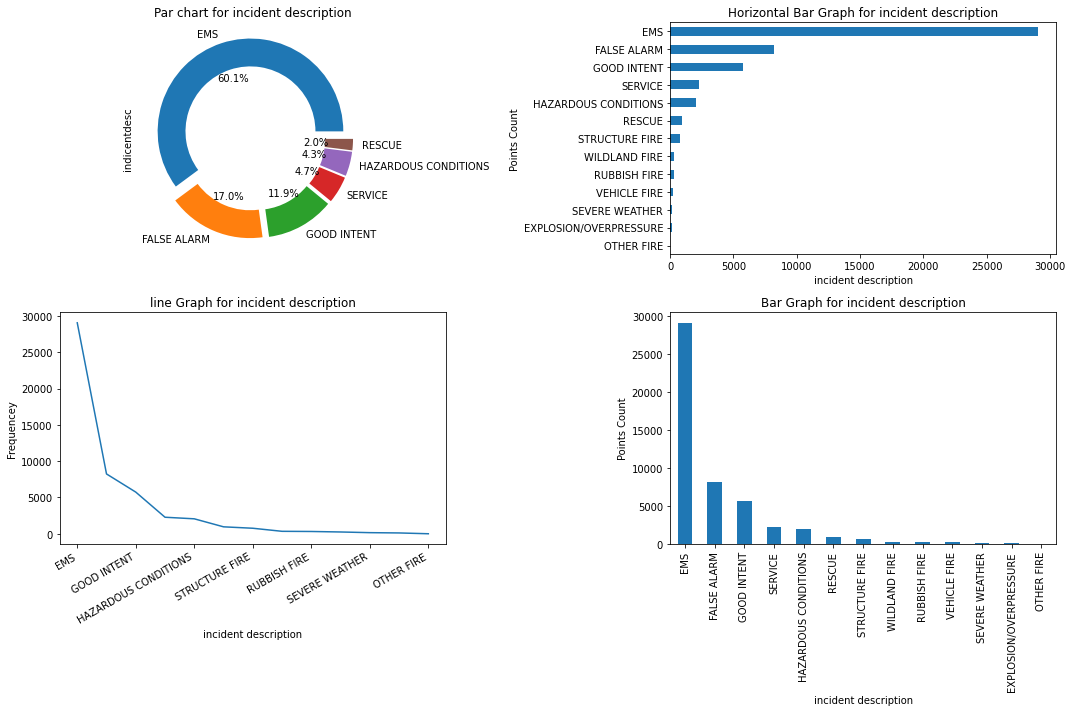

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

dataset['indicentdesc'].value_counts()[:6].plot(kind = 'pie' ,ax =axes[0][0],autopct ='%1.1f%%' ,explode = [0.08]*6, wedgeprops=dict(width=.3) ) ;

dataset['indicentdesc'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

dataset['indicentdesc'].value_counts().plot(ax =axes[1][0]) ;

dataset['indicentdesc'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for incident description') ; 
axes[0][1].set_title('Horizontal Bar Graph for incident description'); 
axes[1][0].set_title('line Graph for incident description') ; 
axes[1][1].set_title('Bar Graph for incident description') ; 




axes[0][1].set(xlabel="incident description", ylabel="Points Count") ;
axes[1][0].set(xlabel="incident description", ylabel="Frequencey") ;
axes[1][1].set(xlabel="incident description", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()



> Our Analysis can be summeraized  <font color = 'Orange'> as mentioned in analysis above EMS calls is the most common ones , However here we have very interesting insight which is that the False alaram is the second common incident type with 17%  !




### Most Common incident major category


> Let's Find what is the most common incident  major category in 

```
majorcategory 
```
column

> Since majorcategory column has relatively small amount of data we can use  <font color = 'Orange'>  waffle chart to visualize it  <font color = 'Black'> Also it is a good idea to compare it with indicentdesc waffle chart to ensure the findings!!. 





In [ ]:
dataset['majorcategory'].value_counts()

EMS           29052
FALSEALARM     8237
GOODINTENT     5737
SERVICE        2275
FIRE           1768
OTHERHAZAR     1085
HAZMAT          973
RESCUE          955
SEVERE          152
Name: majorcategory, dtype: int64

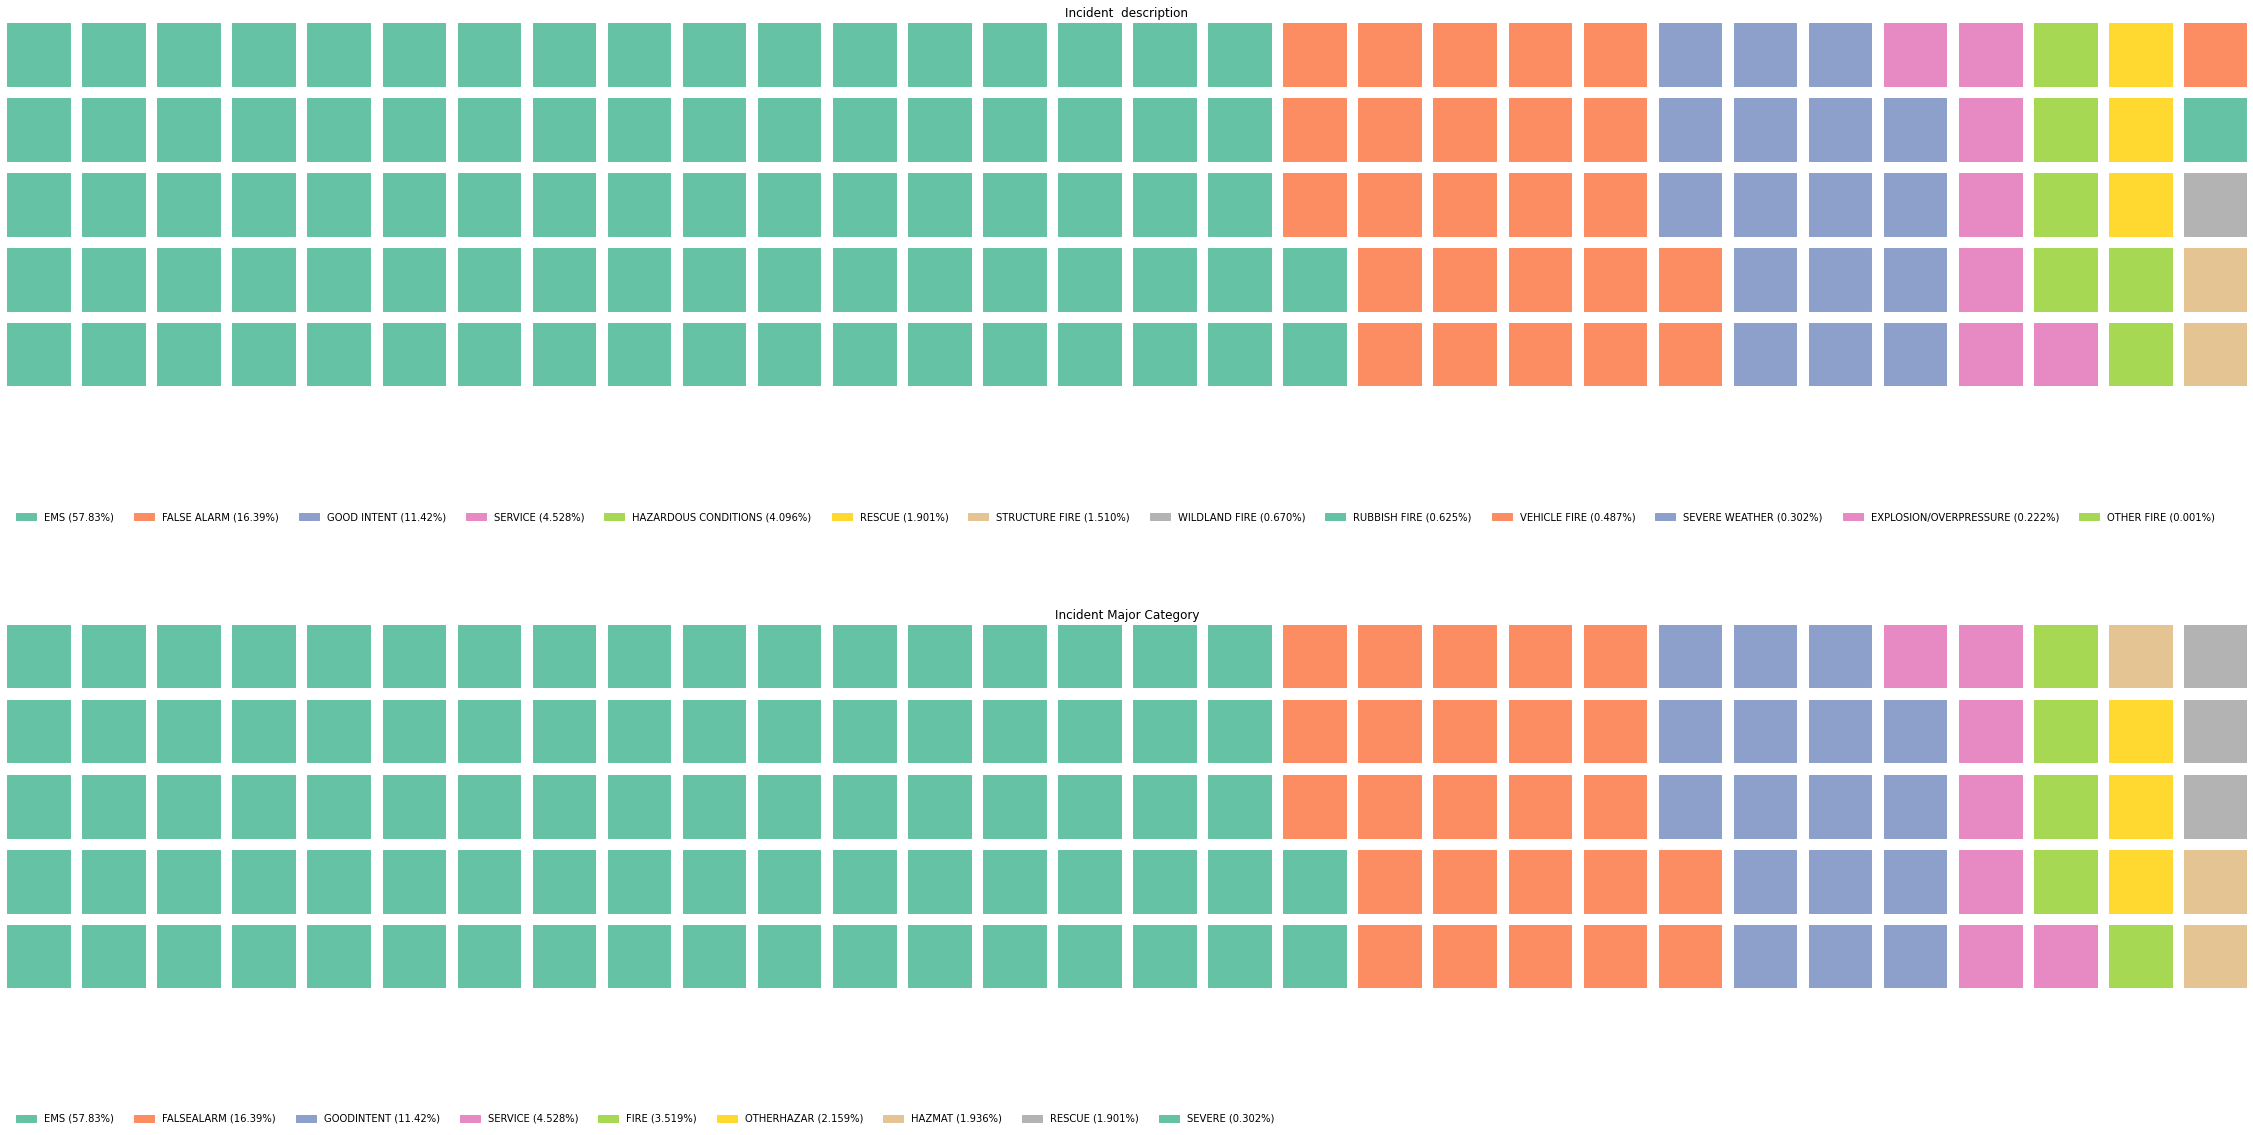

<Figure size 432x288 with 0 Axes>

In [ ]:

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
                'values' : dataset['indicentdesc'].value_counts().to_dict(), 
    'title' : {'label': 'Incident  description', 'loc': 'center'},
    'labels':["{0} ({1}%)".format(k, str(v/dataset['indicentdesc'].value_counts().sum()*100)[:5]) for k, v in dataset['indicentdesc'].value_counts().to_dict().items()],
    'legend':{'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len( dataset['indicentdesc'].value_counts().to_dict()), 'framealpha': 0}
        },
        '312': {
                'values' : dataset['majorcategory'].value_counts().to_dict(), 
    'title' : {'label': 'Incident Major Category', 'loc': 'center'},
    'labels':["{0} ({1}%)".format(k, str(v/dataset['majorcategory'].value_counts().sum()*100)[:5]) for k, v in dataset['majorcategory'].value_counts().to_dict().items()],
    'legend':{'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(dataset['majorcategory'].value_counts().to_dict()), 'framealpha': 0}}
        },
    rows=5,
    columns = 30 ,  
    figsize=(35, 24) 
);
plt.show() ;
plt.tight_layout() ;



> Our Analysis can be summeraized  <font color = 'Orange'> as mentioned in analysis above EMS  the most common incident  with ~ 58% of the whole incidents followed by FAlse alarms !

> From Above Analysis we can deduce that the town of Carry need  <font color = 'Orange'> to have more advanced / better alram and smoke systems to reduce false alarm incidents and allow the help <font color = 'Black'> to go for who really needs it.





In [ ]:
dataset

,alarmtime,year,incidentnum,exp_no,incidentcode,incitypedesc,indicentdesc,majorcategory,streetaddress,mutl_aid,station,shift,current_district,current_fmz,latitude,longitude,geopoint,incidentcodeGroups
0,2018-03-26T12:04:37+00:00,2018,18-0002460,0,651,"Smoke scare, odor of smoke",GOOD INTENT,GOODINTENT,519 BANKHEAD DR,N,008,A,008,8C,35.801883,-78.895481,POINT (-78.895481 35.801883),600
1,2018-03-26T10:30:47+00:00,2018,18-0002457,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,32104 ARMOUR ST,N,009,A,009,9A,35.757833,-78.731762,POINT (-78.731762 35.757833),300
2,2018-03-26T09:13:04+00:00,2018,18-0002454,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,6900 CARPENTER FIRE STATION RD,N,007,A,007,7D,35.824521,-78.876081,POINT (-78.876081 35.824521),300
3,2018-03-25T20:45:33+00:00,2018,18-0002448,0,746,"Carbon monoxide detector activation, no CO",FALSE ALARM,FALSEALARM,132 CLINTON CT,N,009,C,002,2C,35.778379,-78.785899,POINT (-78.785899 35.778379),700
4,2018-03-25T04:29:19+00:00,2018,18-0002436,0,311,"Medical assist, assist EMS crew",EMS,EMS,100 PHACELIA WAY,N,006,A,006,6A,35.715518,-78.755813,POINT (-78.755813 35.715518),300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50371,2016-01-01T14:43:33+00:00,2016,16-0000018,0,321,"EMS call, excluding vehicle accident with injury",EMS,EMS,VILLAGE GREENWAY,N,009,C,009,2B,35.780860,-78.762233,POINT (-78.76223299999999 35.78086),300
50372,2016-01-01T09:38:19+00:00,2016,16-0000013,0,700,"False alarm or false call, Other",FALSE ALARM,FALSEALARM,8213 HENDERSON RD,2,006,C,006,12A,35.668363,-78.750872,POINT (-78.750872 35.668363),700
50373,2016-01-01T09:32:04+00:00,2016,16-0000012,0,311,"Medical assist, assist EMS crew",EMS,EMS,526 DENHOFF DR,N,007,C,007,10A,35.862263,-78.900390,POINT (-78.90039 35.862263),300
50374,2016-01-01T02:38:34+00:00,2016,16-0000004,0,510,"Person in distress, Other",SERVICE,SERVICE,300 AIRGATE DR,2,001,B,001,14D,35.865377,-78.814964,POINT (-78.814964 35.865377),500


### Mutual Aid Distribution 

> Let's Find what is the Mutual Aid Distribution

```
mutl_aid 
```
column

> Since Mutual Aid  column has relatively small amount of data we can use  <font color = 'Orange'>  donut chart along with bar and line charts to visualize it  <font color = 'Black'>.



In [ ]:
len(dataset['mutl_aid'].value_counts().unique())

6

In [ ]:
dataset['mutl_aid'].value_counts()

N    43945
2     3427
4     2514
3      200
1      147
5        1
Name: mutl_aid, dtype: int64

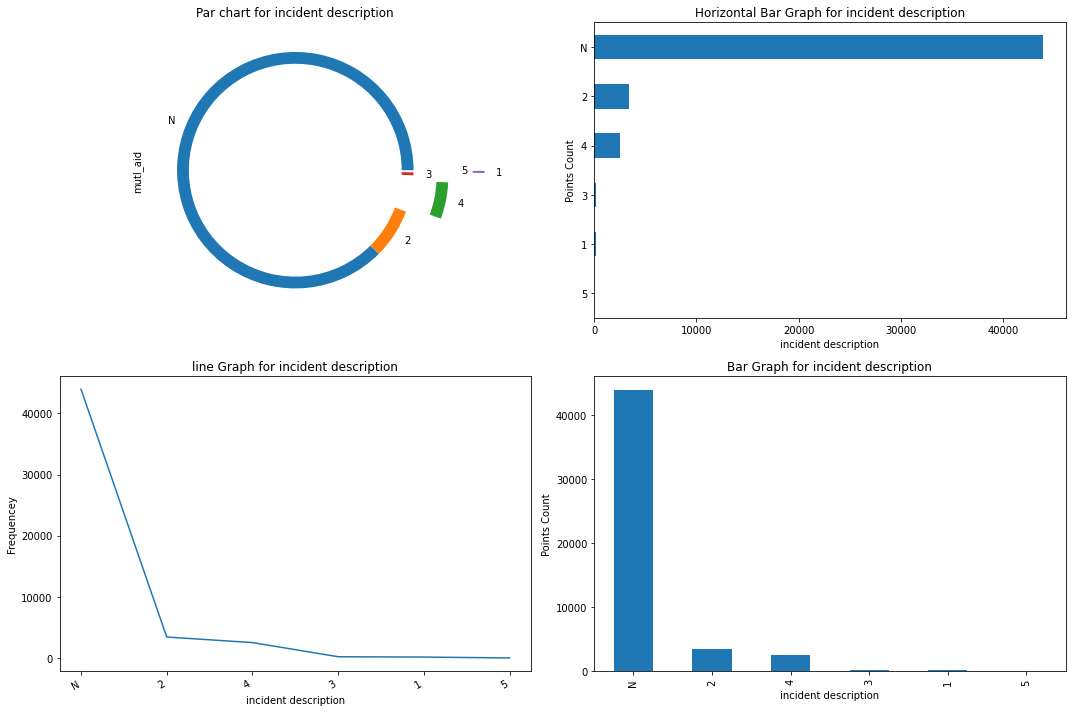

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

dataset['mutl_aid'].value_counts()[:6].plot(kind = 'pie' ,ax =axes[0][0] ,explode = [0,0,0.3,0,.6,0.3] , wedgeprops=dict(width=.1) ) ;

dataset['mutl_aid'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

dataset['mutl_aid'].value_counts().plot(ax =axes[1][0]) ;

dataset['mutl_aid'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for incident description') ; 
axes[0][1].set_title('Horizontal Bar Graph for incident description'); 
axes[1][0].set_title('line Graph for incident description') ; 
axes[1][1].set_title('Bar Graph for incident description') ; 




axes[0][1].set(xlabel="incident description", ylabel="Points Count") ;
axes[1][0].set(xlabel="incident description", ylabel="Frequencey") ;
axes[1][1].set(xlabel="incident description", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()







> Our Analysis can be summeraized as  <font color = 'Orange'> as mentioned in analysis above EMS  the most common incident  with ~ 58% of the whole incidents followed by FAlse alarms ! .

> From Above Analysis we can deduce that the town of carry need  <font color = 'Orange'> to have more advanced / better alram and smoke systems to reduce false alarm incidents and allow the help <font color = 'Black'> to go for who really needs it.





### Most Stressed/Used  Station 
> Let's Find what is the Most Stressed/Used  Station 

```
Station 
```
column

> Since Mutual Aid  column has medium amount of unique data we can use  <font color = 'Orange'>  waffle chart along with bar chart to visualize it <font color = 'Black'>.



In [ ]:
dataset['station'].value_counts().unique()

array([9122, 6874, 6001, 5690, 5170, 4945, 4373, 4356, 3673,    8,    7,
          4,    3,    2,    1])

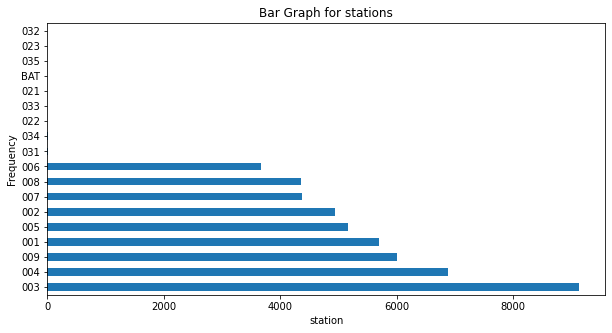

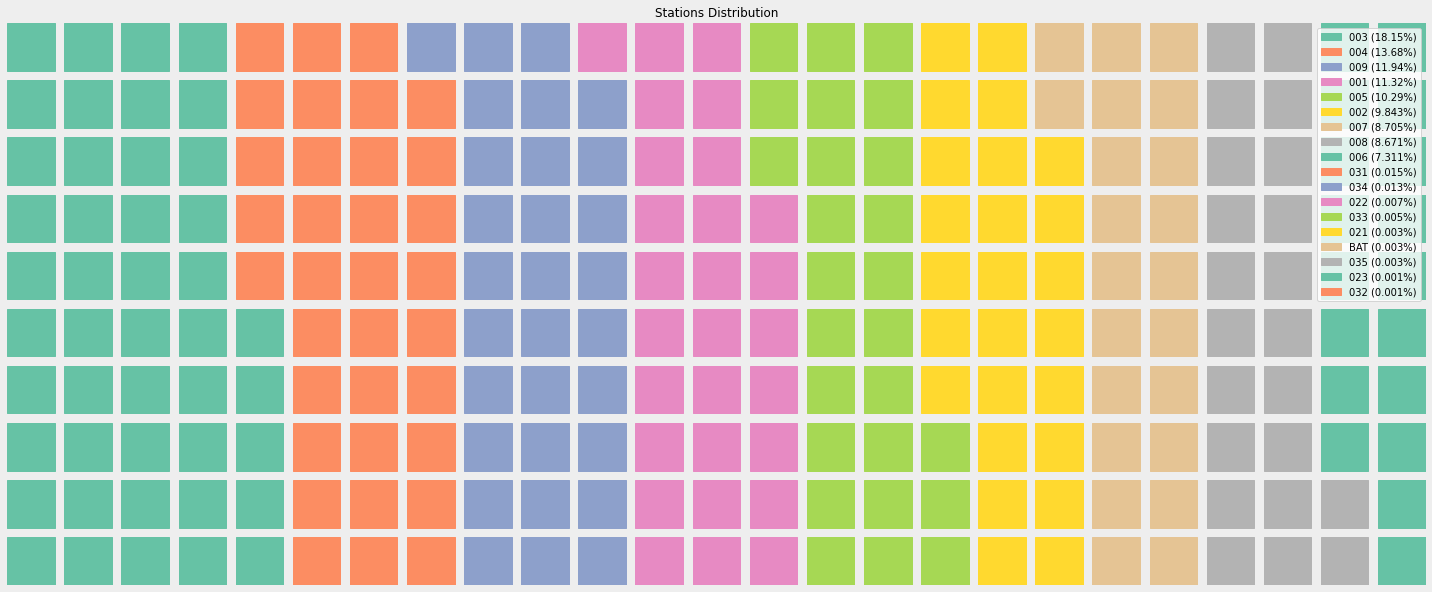

<Figure size 432x288 with 0 Axes>

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, ax = plt.subplots(1,1, figsize=(10,5))

dataset['station'].value_counts().sort_values(ascending  = False).plot(kind = 'barh' , ax = ax) ;

ax.set(xlabel="station", ylabel="Frequency") ;


ax.set_title('Bar Graph for stations') ; 


data = dataset['station'].value_counts().to_dict()
fig = plt.figure(
    FigureClass=Waffle, 
    figsize = (20,15) ,
    rows=10, 
    columns = 25 , 
    values=data, 
    title={'label': 'Stations Distribution', 'loc': 'center'},
    labels=["{0} ({1}%)".format(k, str(v/dataset['station'].value_counts().sum()*100)[:5]) for k, v in data.items()],

)

fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()


plt.tight_layout()







> Here we have an interesting finding that stations <font color = 'Orange'> 001-009 has  been the most common stations <font color = 'Black'> on the other hand stations [021 , 035 , 023 , 032] have been the least common ones with nearly <font color = 'Orange'> ~ 0.003 to 0.001 % of the dataset stations.




### Most Stressed  shift 
> Let's Find what is the Most Stressed shift 

```
shift 
```
column

> Since shift  column has kow amount of unique data we can use  <font color = 'Orange'>  pie chart along with bar chart to visualize it <font color = 'Black'>.



In [ ]:
dataset['shift'].value_counts()

C    16799
B    16763
A    16672
Name: shift, dtype: int64

In [ ]:
dataset['shift'].value_counts().unique().shape[0]

3

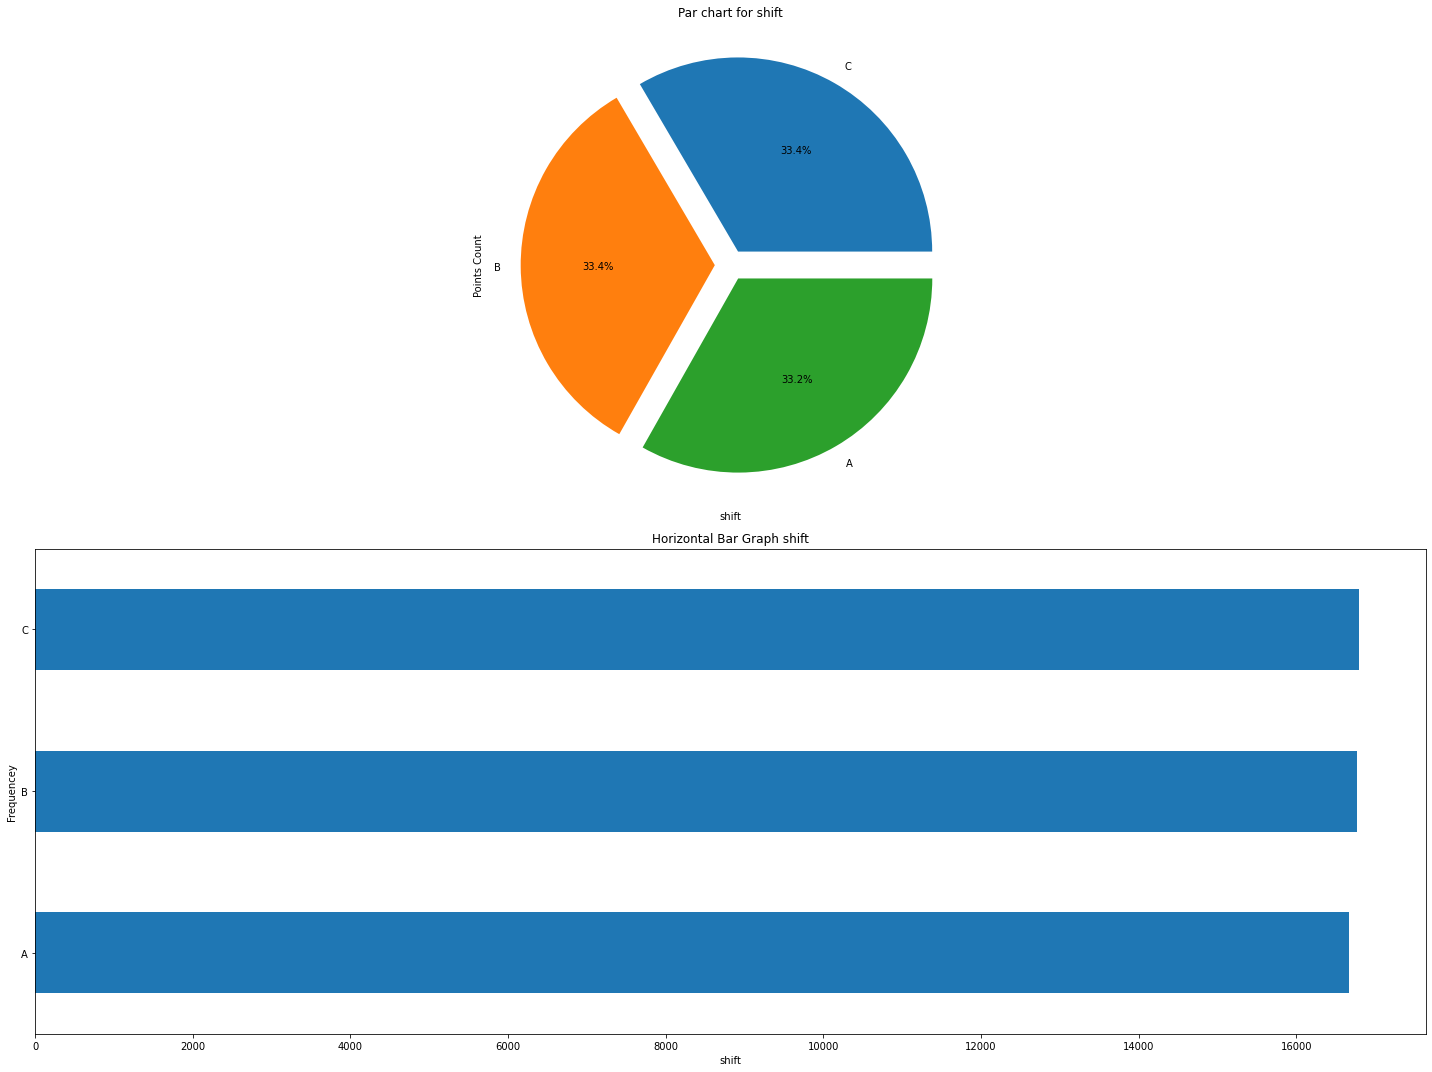

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,1, figsize=(20,15))

dataset['shift'].value_counts().plot(kind = 'pie' ,ax =axes[0],autopct ='%1.1f%%' ,explode = [0.08]*3 ) ;
dataset['shift'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[1])


axes[0].set_title('Par chart for shift') ; 
axes[1].set_title('Horizontal Bar Graph shift'); 



axes[0].set(xlabel="shift", ylabel="Points Count") ;
axes[1].set(xlabel="shift", ylabel="Frequencey") ; 






plt.tight_layout()

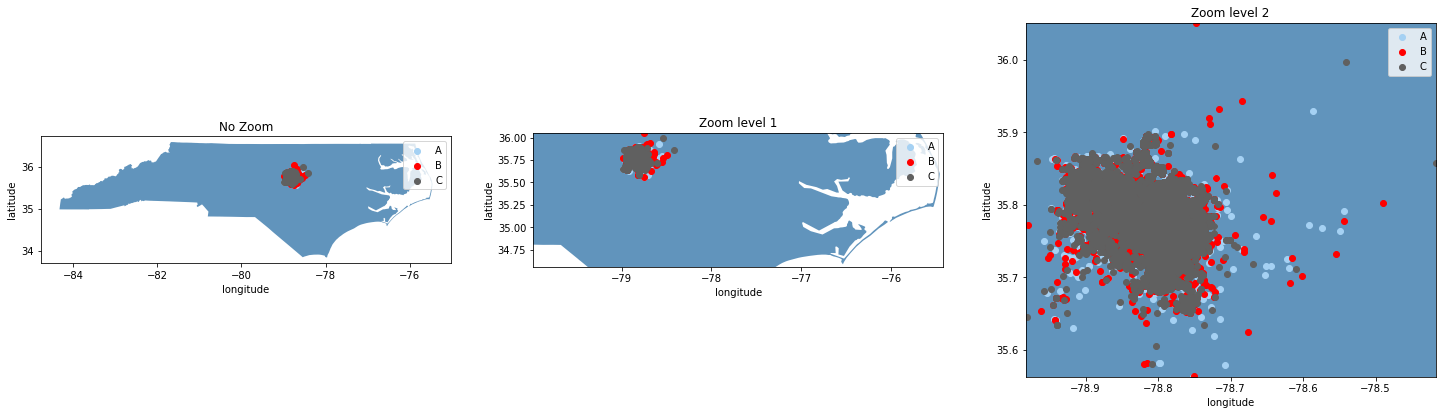

In [ ]:
'''
Create subplots with different Zoom levels to see the points from near positions
'''

_, axes = plt.subplots(1,3, figsize=(25,15))

base = COUNTRY.plot(ax=axes[1],color = '#6194BC') ; 

base_1 = COUNTRY.plot(ax=axes[0],color = '#6194BC') ; 
base_2 = COUNTRY.plot(ax=axes[2] , color = '#6194BC') ; 




dataset_x[dataset_x['shift']=='A'].plot(ax=base_1, color='#A5D1F3' , label = 'A');
dataset_x[dataset_x['shift']=='B'].plot(ax=base_1, color='red',label = 'B');
dataset_x[dataset_x['shift']=='C'].plot(ax=base_1, color='#606060',label = 'C');



axes[0].set(xlabel="longitude", ylabel="latitude") ;

dataset_x[dataset_x['shift']=='A'].plot(ax=base, color='#A5D1F3' , label = 'A');
dataset_x[dataset_x['shift']=='B'].plot(ax=base, color='red',label = 'B');
dataset_x[dataset_x['shift']=='C'].plot(ax=base, color='#606060',label = 'C');





axes[1].axis([dataset['longitude'].min() -1 ,dataset['longitude'].max() + 3 , 
              dataset['latitude'].min() - 1,dataset['latitude'].max() ]) ; 

axes[1].set(xlabel="longitude", ylabel="latitude") ; 


dataset_x[dataset_x['shift']=='A'].plot(ax=base_2, color='#A5D1F3' , label = 'A');
dataset_x[dataset_x['shift']=='B'].plot(ax=base_2, color='red',label = 'B');
dataset_x[dataset_x['shift']=='C'].plot(ax=base_2, color='#606060',label = 'C');



axes[2].axis([dataset['longitude'].min()  ,dataset['longitude'].max() , 
              dataset['latitude'].min() ,dataset['latitude'].max() ]) ;
axes[2].set(xlabel="longitude", ylabel="latitude") ;

axes[0].set_title('No Zoom')
axes[1].set_title('Zoom level 1')
axes[2].set_title('Zoom level 2')

axes[0].legend();
axes[1].legend();
axes[2].legend();




> Here we have another  interesting finding that shifts  <font color = 'Orange'> A,B,C has  been recieving nearly the same amount of incidents  <font color = 'Black'> , Shift C was the most common shift followed by  <font color = 'Orange'> B then A.




### Most Stressed  shift 
> Let's Find what is the Most Stressed district 

```
district 
```
column

> Since shift  column has medium amount of unique data we can use  <font color = 'Orange'>  waffle chart along with bar chart to visualize it <font color = 'Black'>.



In [ ]:
dataset['current_district'].value_counts().shape[0]

24

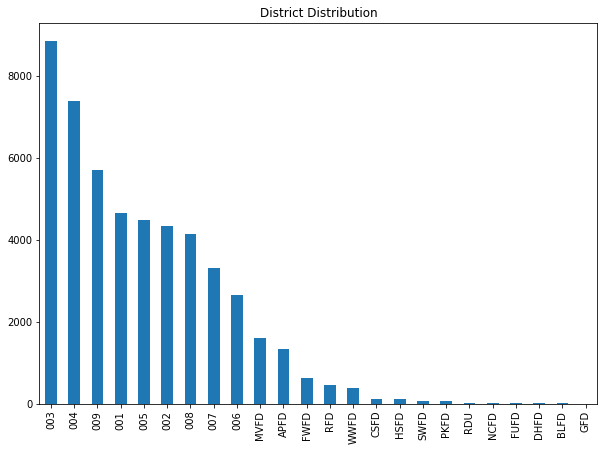

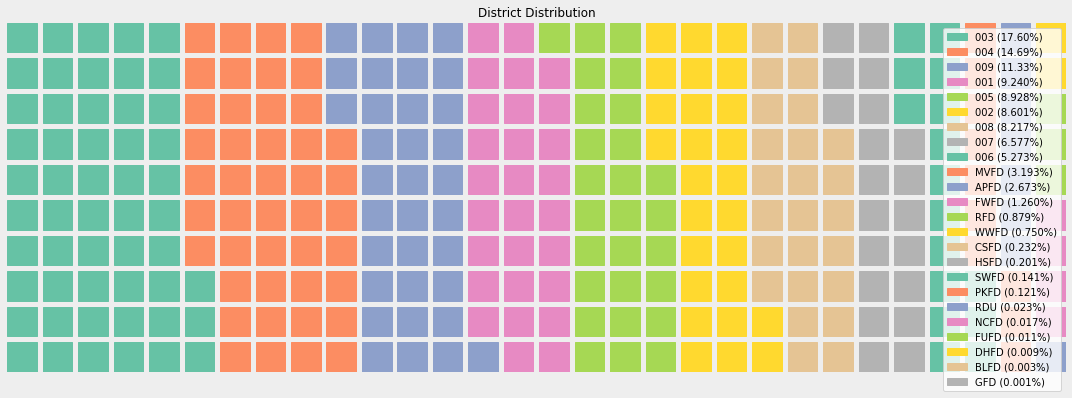

<Figure size 432x288 with 0 Axes>

In [ ]:
dataset['current_district'].value_counts().plot(kind = 'bar' ,  figsize =(10,7) , title ='District Distribution') ; 
data = dataset['current_district'].value_counts().to_dict()
fig = plt.figure(
    FigureClass=Waffle, 
    figsize = (15,7) ,
    rows=10, 
    columns = 30 , 
    values=data, 
    title={'label': 'District Distribution', 'loc': 'center'},
    labels=["{0} ({1}%)".format(k, str(v/dataset['current_district'].value_counts().sum()*100)[:5]) for k, v in data.items()],
) 
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()


plt.tight_layout()





> Here we have another  interesting finding that Districts  <font color = 'Orange'> 003 , 004 , 009 , 001 , 005 , 002 ,008   have been the most common districts while <font color = 'Black'> BLFD , GFD has been the least common ones <font color = 'Orange'>.




### Most Stressed Response zone


> Let's Find what is the most common value in

```
current_fmz
```
column


> Since  Response zone  column has medium amount of unique data we can use  <font color = 'Orange'>  bar chart to visualize it <font color = 'Black'>.



In [ ]:
dataset['current_fmz'].value_counts().shape[0]

64

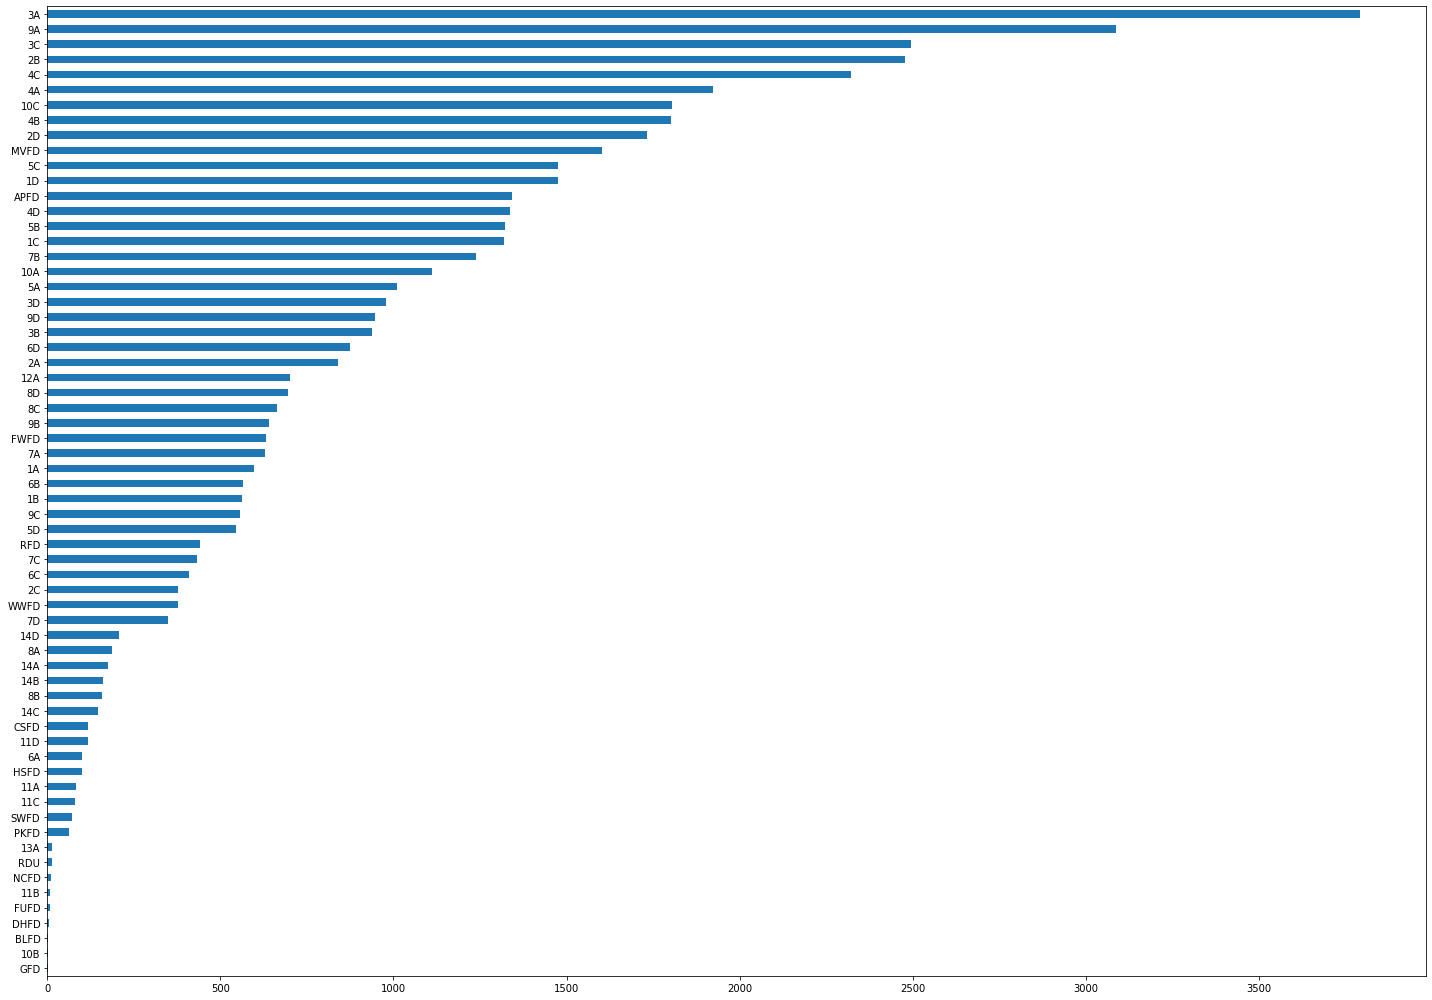

In [ ]:
dataset['current_fmz'].value_counts().sort_values(ascending = True).plot(kind = 'barh' ,  figsize =(20,14)) ; 
plt.tight_layout()





> Here we have another  interesting finding that Response Zones  <font color = 'Orange'> 3A , 9A , 3C , 2B have been the most common ones <font color = 'Black'> BLFD , GFD have been the least common ones <font color = 'Orange'>.




### Date where most incidents occur


> Let's Find what is the most common value in

```
Date
```
columns 

> Since Date  have tons of unique values we can use <font color = 'Orange'>line graph and Top Common values bar graph to <font color = 'Black'> clear our idea and come up with our insight. 



In [ ]:
Date_Time_df['Date'].value_counts().shape[0]

1859

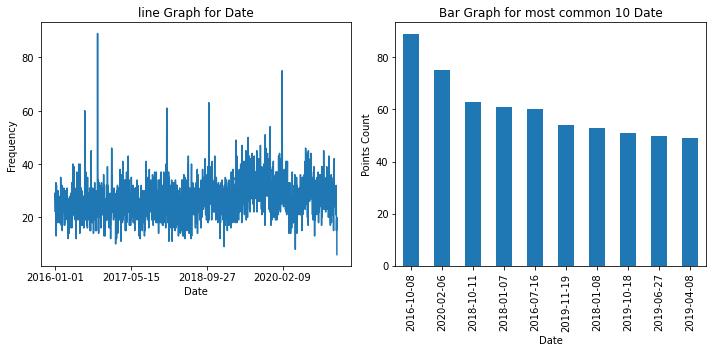

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, axes = plt.subplots(1,2, figsize=(10,5))

Date_Time_df['Date'].value_counts().sort_index().plot(kind='line', ax = axes[0]) ;
Date_Time_df['Date'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar' , ax = axes[1])

axes[0].set(xlabel="Date", ylabel="Frequency") ;
axes[1].set(xlabel="Date", ylabel="Points Count") ;


axes[0].set_title('line Graph for Date') ; 
axes[1].set_title('Bar Graph for most common 10 Date'); 



plt.tight_layout()

In [ ]:
Date_Time_df

,Date,Time,Years,Months,Days,Hour,Minute,Quarters,Months Names,Season
0,2018-03-26,12:04:37,2018,03,26,12,04,Q 1,March,Winter
1,2018-03-26,10:30:47,2018,03,26,10,30,Q 1,March,Winter
2,2018-03-26,09:13:04,2018,03,26,09,13,Q 1,March,Winter
3,2018-03-25,20:45:33,2018,03,25,20,45,Q 1,March,Winter
4,2018-03-25,04:29:19,2018,03,25,04,29,Q 1,March,Winter
...,...,...,...,...,...,...,...,...,...,...
50229,2016-01-01,14:43:33,2016,01,01,14,43,Q 1,January,Winter
50230,2016-01-01,09:38:19,2016,01,01,09,38,Q 1,January,Winter
50231,2016-01-01,09:32:04,2016,01,01,09,32,Q 1,January,Winter
50232,2016-01-01,02:38:34,2016,01,01,02,38,Q 1,January,Winter


### Date where most incidents occur


> Let's Find what is the most common value in

```
Time
```
columns 

> Since Time  have tons of unique values we can use <font color = 'Orange'>line graph and Top Common values bar graph to <font color = 'Black'> clear our idea and come up with our insight. 



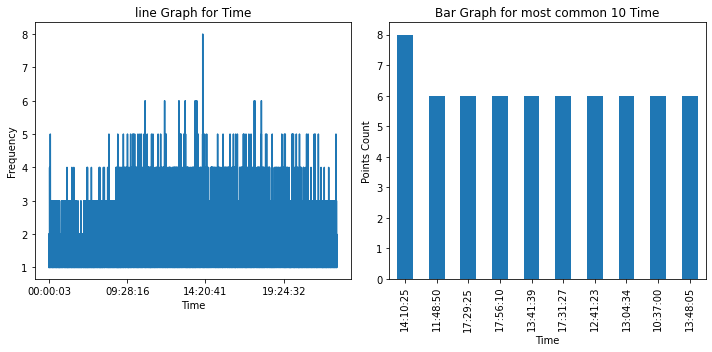

In [ ]:
'''
Create density and bar graphs for both longitude and latitude
'''

_, axes = plt.subplots(1,2, figsize=(10,5))

Date_Time_df['Time'].value_counts().sort_index().plot(kind='line', ax = axes[0]) ;
Date_Time_df['Time'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).iloc[:10].plot(kind = 'bar' , ax = axes[1])

axes[0].set(xlabel="Time", ylabel="Frequency") ;
axes[1].set(xlabel="Time", ylabel="Points Count") ;


axes[0].set_title('line Graph for Time') ; 
axes[1].set_title('Bar Graph for most common 10 Time'); 



plt.tight_layout()

### Most Stressed  shift 
> Let's Find what is the Most Stressed shift 

```
Years 
```
column

> Since Years  column has low amount of unique data we can use  <font color = 'Orange'>  pie chart along with bar chart to visualize it <font color = 'Black'>.



In [ ]:
Date_Time_df['Years'].value_counts().shape[0]

6

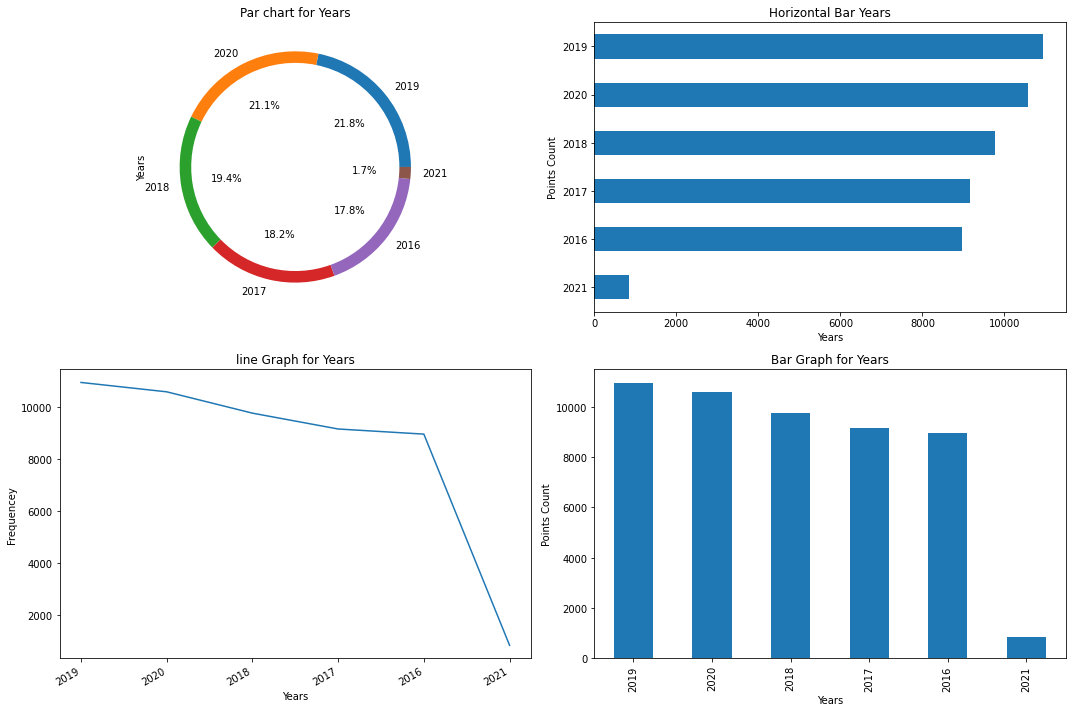

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

Date_Time_df['Years'].value_counts()[:6].plot(kind = 'pie' ,ax =axes[0][0]  ,autopct ='%1.1f%%',wedgeprops=dict(width=.1) ) ;

Date_Time_df['Years'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

Date_Time_df['Years'].value_counts().plot(ax =axes[1][0]) ;

Date_Time_df['Years'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for Years') ; 
axes[0][1].set_title('Horizontal Bar Years'); 
axes[1][0].set_title('line Graph for Years') ; 
axes[1][1].set_title('Bar Graph for Years') ; 




axes[0][1].set(xlabel="Years", ylabel="Points Count") ;
axes[1][0].set(xlabel="Years", ylabel="Frequencey") ;
axes[1][1].set(xlabel="Years", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()





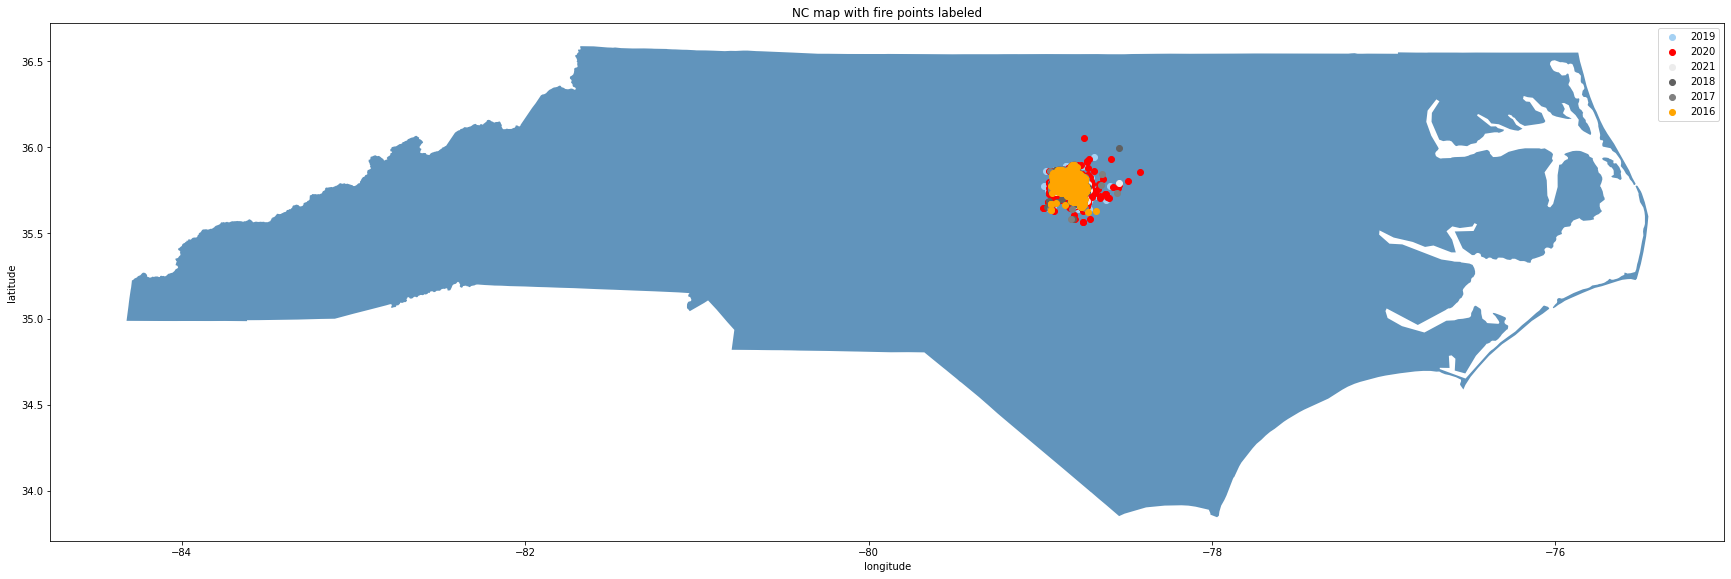

In [ ]:
# plotting the fire positions on top with red color 
dataset_x['Years'] = Date_Time_df['Years']
fig, ax = plt.subplots(1, figsize=(30,20))
base = COUNTRY.plot(ax=ax ,color =  '#6194BC') ; 
dataset_x[dataset_x['Years']=='2019'].plot(ax=base, color='#A5D1F3' , label = '2019');
dataset_x[dataset_x['Years']=='2020'].plot(ax=base, color='red',label = '2020');
dataset_x[dataset_x['Years']=='2021'].plot(ax=base, color='#ECECEC',label = '2021');
dataset_x[dataset_x['Years']=='2018'].plot(ax=base, color='#606060',label = '2018');
dataset_x[dataset_x['Years']=='2017'].plot(ax=base, color='grey',label = '2017');
dataset_x[dataset_x['Years']=='2016'].plot(ax=base, color='orange',label = '2016');




ax.set(xlabel="longitude", ylabel="latitude") ; 
ax.set_title('NC map with fire points labeled') ; 
ax.legend();


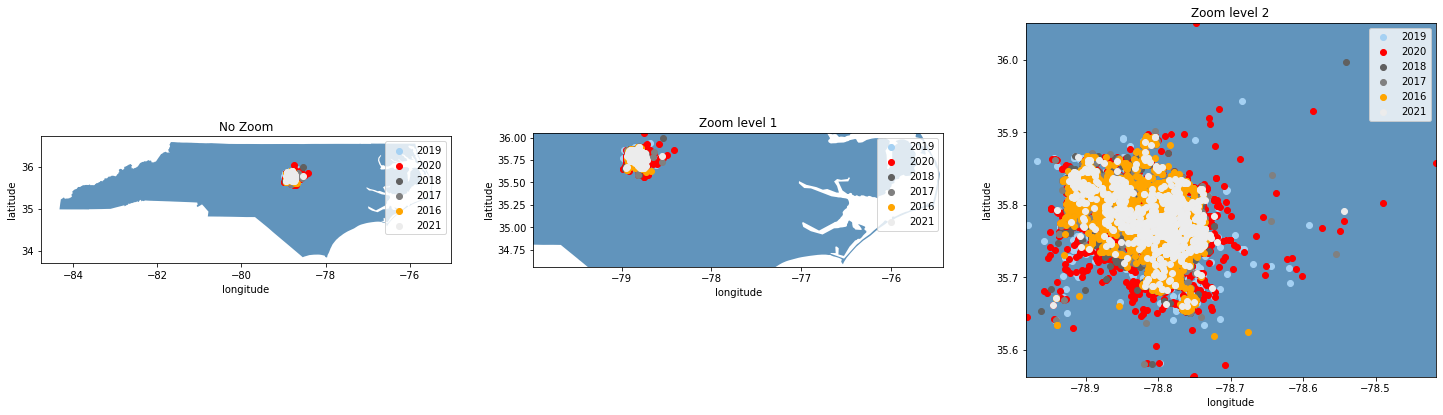

In [ ]:
'''
Create subplots with different Zoom levels to see the points from near positions
'''

_, axes = plt.subplots(1,3, figsize=(25,15))

base = COUNTRY.plot(ax=axes[1],color = '#6194BC') ; 

base_1 = COUNTRY.plot(ax=axes[0],color = '#6194BC') ; 
base_2 = COUNTRY.plot(ax=axes[2] , color = '#6194BC') ; 




dataset_x[dataset_x['Years']=='2019'].plot(ax=base_1, color='#A5D1F3' , label = '2019');
dataset_x[dataset_x['Years']=='2020'].plot(ax=base_1, color='red',label = '2020');
dataset_x[dataset_x['Years']=='2018'].plot(ax=base_1, color='#606060',label = '2018');
dataset_x[dataset_x['Years']=='2017'].plot(ax=base_1, color='grey',label = '2017');
dataset_x[dataset_x['Years']=='2016'].plot(ax=base_1, color='orange',label = '2016');
dataset_x[dataset_x['Years']=='2021'].plot(ax=base_1, color='#ECECEC',label = '2021');


axes[0].set(xlabel="longitude", ylabel="latitude") ;

dataset_x[dataset_x['Years']=='2019'].plot(ax=base, color='#A5D1F3' , label = '2019');
dataset_x[dataset_x['Years']=='2020'].plot(ax=base, color='red',label = '2020');
dataset_x[dataset_x['Years']=='2018'].plot(ax=base, color='#606060',label = '2018');
dataset_x[dataset_x['Years']=='2017'].plot(ax=base, color='grey',label = '2017');
dataset_x[dataset_x['Years']=='2016'].plot(ax=base, color='orange',label = '2016');
dataset_x[dataset_x['Years']=='2021'].plot(ax=base, color='#ECECEC',label = '2021');




axes[1].axis([dataset['longitude'].min() -1 ,dataset['longitude'].max() + 3 , 
              dataset['latitude'].min() - 1,dataset['latitude'].max() ]) ; 

axes[1].set(xlabel="longitude", ylabel="latitude") ; 


dataset_x[dataset_x['Years']=='2019'].plot(ax=base_2, color='#A5D1F3' , label = '2019');
dataset_x[dataset_x['Years']=='2020'].plot(ax=base_2, color='red',label = '2020');
dataset_x[dataset_x['Years']=='2018'].plot(ax=base_2, color='#606060',label = '2018');
dataset_x[dataset_x['Years']=='2017'].plot(ax=base_2, color='grey',label = '2017');
dataset_x[dataset_x['Years']=='2016'].plot(ax=base_2, color='orange',label = '2016');
dataset_x[dataset_x['Years']=='2021'].plot(ax=base_2, color='#ECECEC',label = '2021');


axes[2].axis([dataset['longitude'].min()  ,dataset['longitude'].max() , 
              dataset['latitude'].min() ,dataset['latitude'].max() ]) ;
axes[2].set(xlabel="longitude", ylabel="latitude") ;

axes[0].set_title('No Zoom')
axes[1].set_title('Zoom level 1')
axes[2].set_title('Zoom level 2')

axes[0].legend();
axes[1].legend();
axes[2].legend();


### Month with most incidents
> Let's Find what is the Month with most incidents

```
Month 
```
column

> Since Month  column has medium amount of unique data we can use  <font color = 'Orange'>  donut chart along with bar chart to visualize it <font color = 'Black'>.



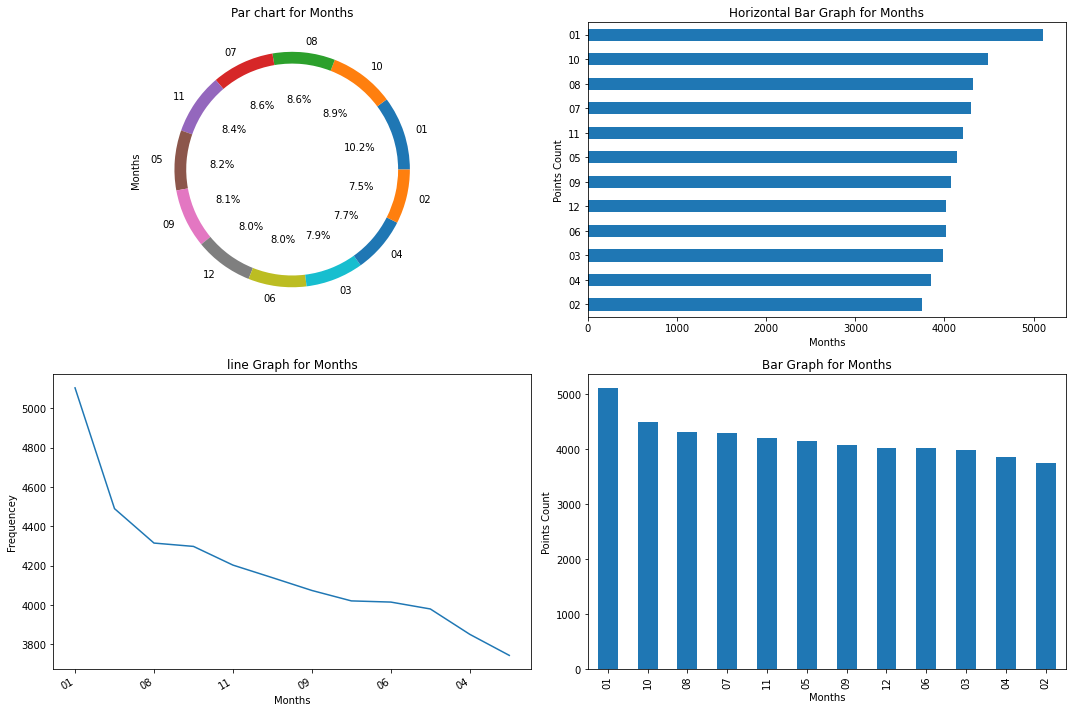

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

Date_Time_df['Months'].value_counts().plot(kind = 'pie' ,ax =axes[0][0]  ,autopct ='%1.1f%%',wedgeprops=dict(width=.1) ) ;

Date_Time_df['Months'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

Date_Time_df['Months'].value_counts().plot(ax =axes[1][0]) ;

Date_Time_df['Months'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for Months') ; 
axes[0][1].set_title('Horizontal Bar Graph for Months'); 
axes[1][0].set_title('line Graph for Months') ; 
axes[1][1].set_title('Bar Graph for Months') ; 




axes[0][1].set(xlabel="Months", ylabel="Points Count") ;
axes[1][0].set(xlabel="Months", ylabel="Frequencey") ;
axes[1][1].set(xlabel="Months", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()





### Day with most incidents
> Let's Find what is the Day with most incidents

```
Days 
```
column

> Since Days  column has medium amount of unique data we can use  <font color = 'Orange'>  line chart along with bar chart to visualize it <font color = 'Black'>.



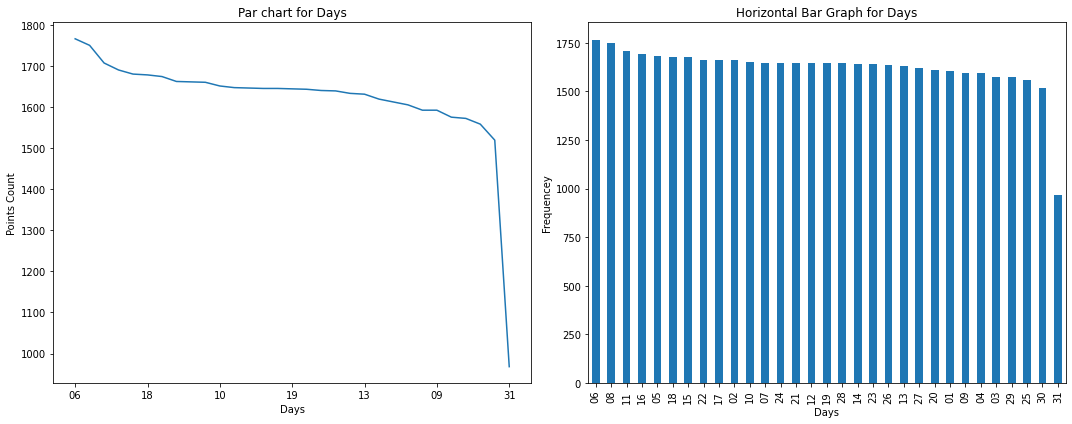

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(1,2, figsize=(15,6))



Date_Time_df['Days'].value_counts().plot(ax =axes[0]) ;

Date_Time_df['Days'].value_counts().sort_index().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1])

axes[0].set_title('Par chart for Days') ; 
axes[1].set_title('Horizontal Bar Graph for Days'); 




axes[0].set(xlabel="Days", ylabel="Points Count") ;
axes[1].set(xlabel="Days", ylabel="Frequencey") ;


plt.tight_layout()





### Hour with most incidents
> Let's Find what is the Hour with most incidents

```
Hour 
```
column

> Since Hour  column has medium amount of unique data we can use  <font color = 'Orange'>  line chart along with bar chart to visualize it <font color = 'Black'>.



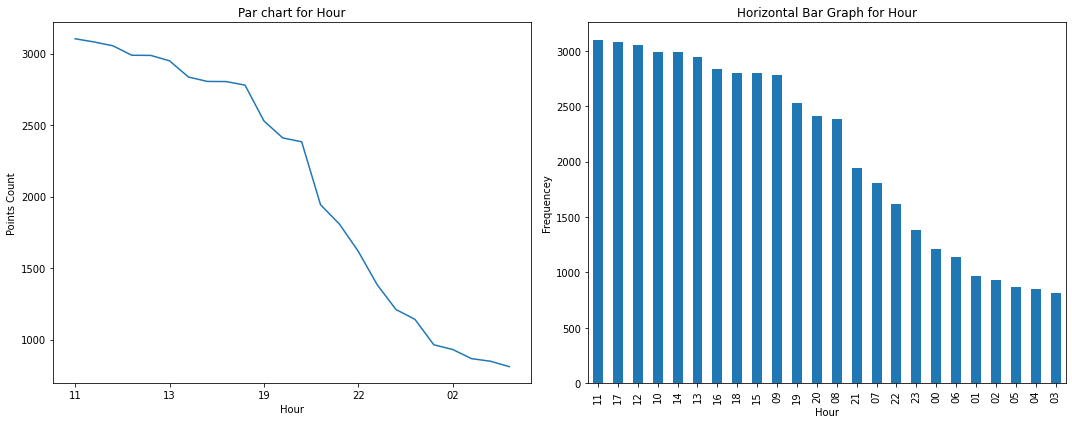

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(1,2, figsize=(15,6))



Date_Time_df['Hour'].value_counts().plot(ax =axes[0]) ;

Date_Time_df['Hour'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1])

axes[0].set_title('Par chart for Hour') ; 
axes[1].set_title('Horizontal Bar Graph for Hour'); 




axes[0].set(xlabel="Hour", ylabel="Points Count") ;
axes[1].set(xlabel="Hour", ylabel="Frequencey") ;


plt.tight_layout()





### Minute with most incidents
> Let's Find what is the Minute with most incidents

```
Minute 
```
column

> Since Minute  column has medium amount of unique data we can use  <font color = 'Orange'>  line chart along with bar chart to visualize it <font color = 'Black'>.



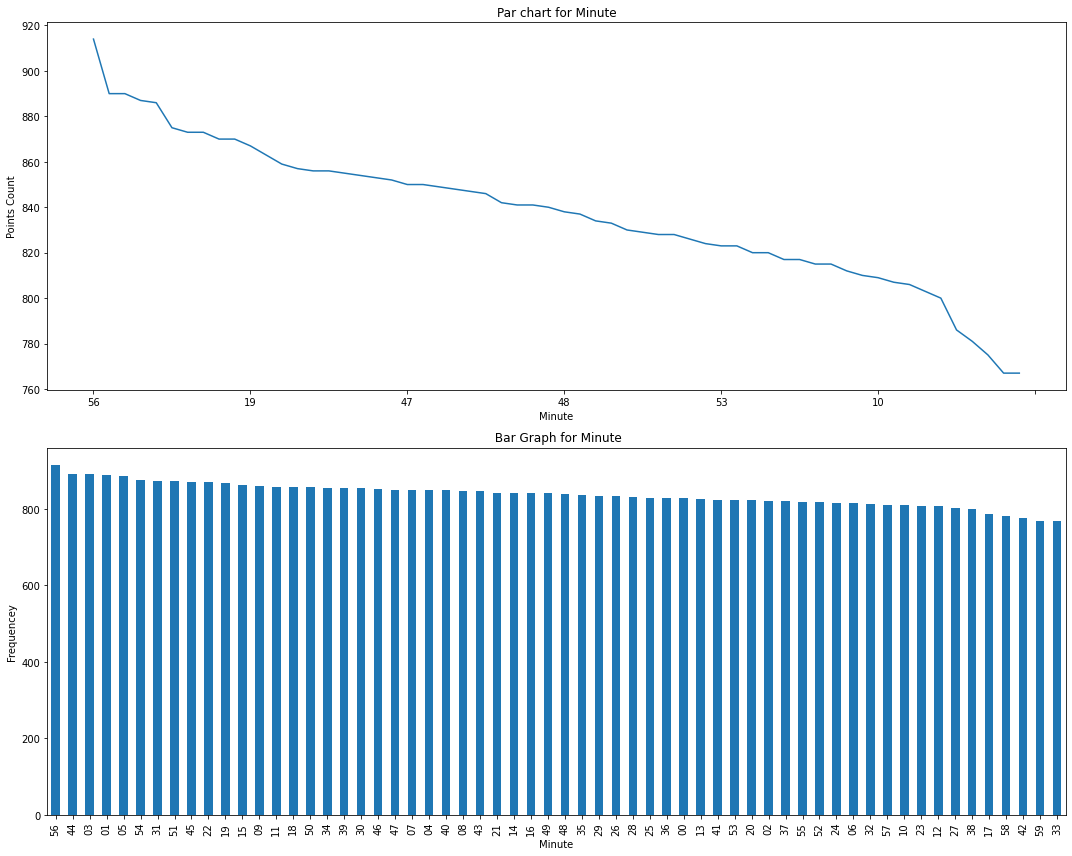

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,1, figsize=(15,12))



Date_Time_df['Minute'].value_counts().plot(ax =axes[0]) ;

Date_Time_df['Minute'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1])

axes[0].set_title('Par chart for Minute') ; 
axes[1].set_title(' Bar Graph for Minute'); 




axes[0].set(xlabel="Minute", ylabel="Points Count") ;
axes[1].set(xlabel="Minute", ylabel="Frequencey") ;


plt.tight_layout()





### Most Stressed  Quarter 
> Let's Find what is the Most Stressed Quarter 

```
Quarter 
```
column

> Since Quarter  column has low amount of unique data we can use  <font color = 'Orange'>  pie chart along with bar chart to visualize it <font color = 'Black'>.



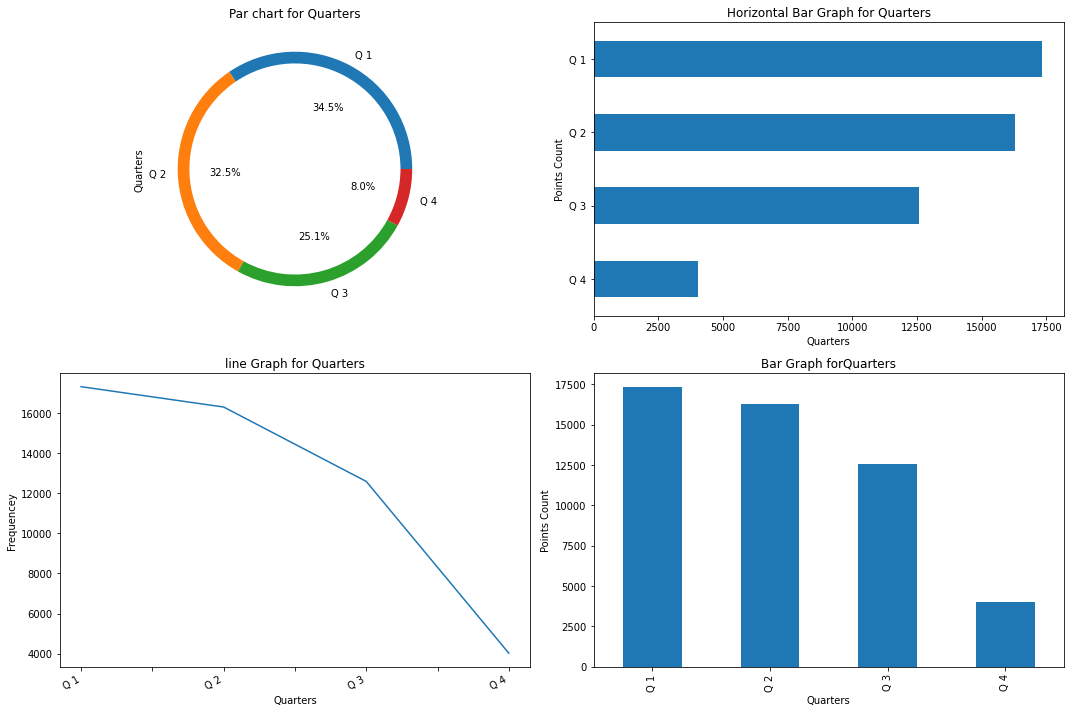

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

Date_Time_df['Quarters'].value_counts().plot(kind = 'pie' ,ax =axes[0][0]  ,autopct ='%1.1f%%',wedgeprops=dict(width=.1) ) ;

Date_Time_df['Quarters'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

Date_Time_df['Quarters'].value_counts().plot(ax =axes[1][0]) ;

Date_Time_df['Quarters'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for Quarters') ; 
axes[0][1].set_title('Horizontal Bar Graph for Quarters'); 
axes[1][0].set_title('line Graph for Quarters') ; 
axes[1][1].set_title('Bar Graph forQuarters') ; 




axes[0][1].set(xlabel="Quarters", ylabel="Points Count") ;
axes[1][0].set(xlabel="Quarters", ylabel="Frequencey") ;
axes[1][1].set(xlabel="Quarters", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()





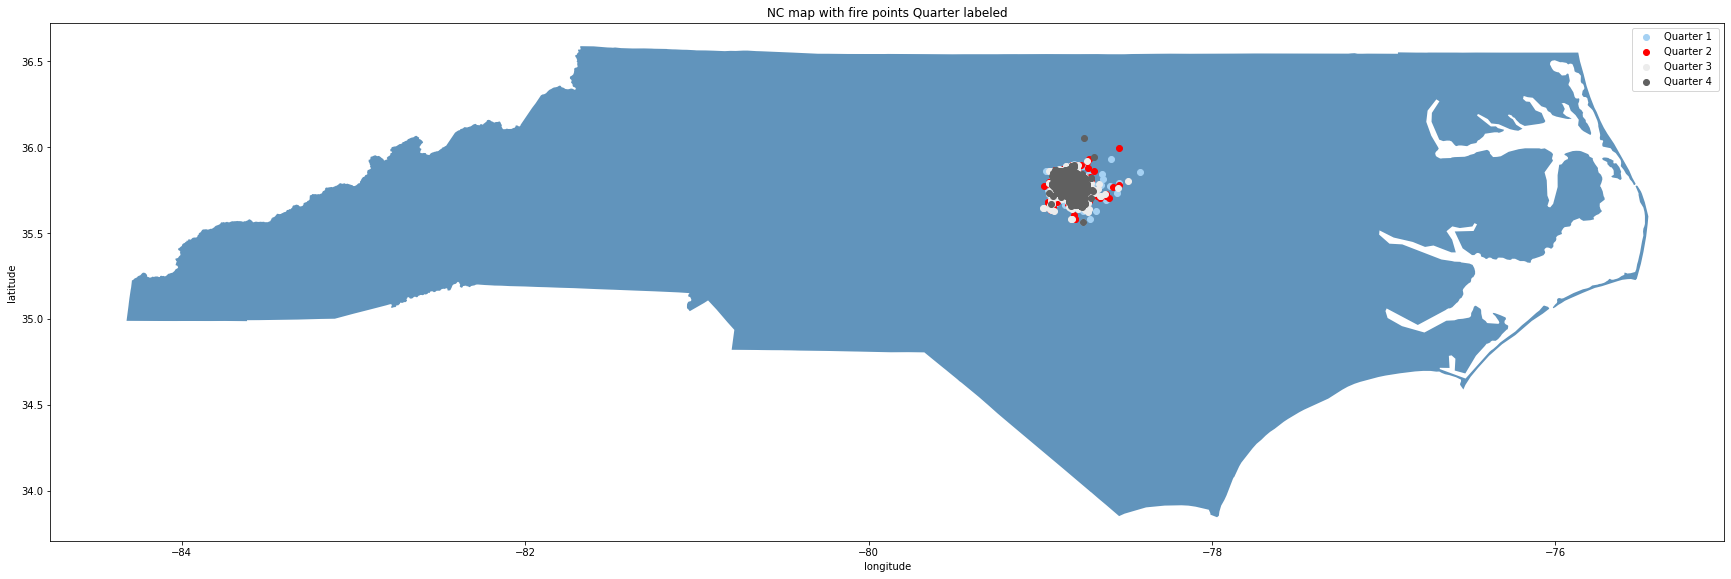

In [ ]:
# plotting the fire positions on top with red color 
dataset_x['Quarters'] = Date_Time_df['Quarters']
fig, ax = plt.subplots(1, figsize=(30,20))
base = COUNTRY.plot(ax=ax ,color =  '#6194BC') ; 
dataset_x[dataset_x['Quarters']=='Q 1'].plot(ax=base, color='#A5D1F3' , label = 'Quarter 1');
dataset_x[dataset_x['Quarters']=='Q 2'].plot(ax=base, color='red',label = 'Quarter 2 ');
dataset_x[dataset_x['Quarters']=='Q 3'].plot(ax=base, color='#ECECEC',label = 'Quarter 3');
dataset_x[dataset_x['Quarters']=='Q 4'].plot(ax=base, color='#606060',label = 'Quarter 4');



ax.set(xlabel="longitude", ylabel="latitude") ; 
ax.set_title('NC map with fire points Quarter labeled') ; 
ax.legend();


### Most Stressed  Season 
> Let's Find what is the Most Stressed Quarter 

```
Season 
```
column

> Since Season  column has low amount of unique data we can use  <font color = 'Orange'>  pie chart along with bar chart to visualize it <font color = 'Black'>.



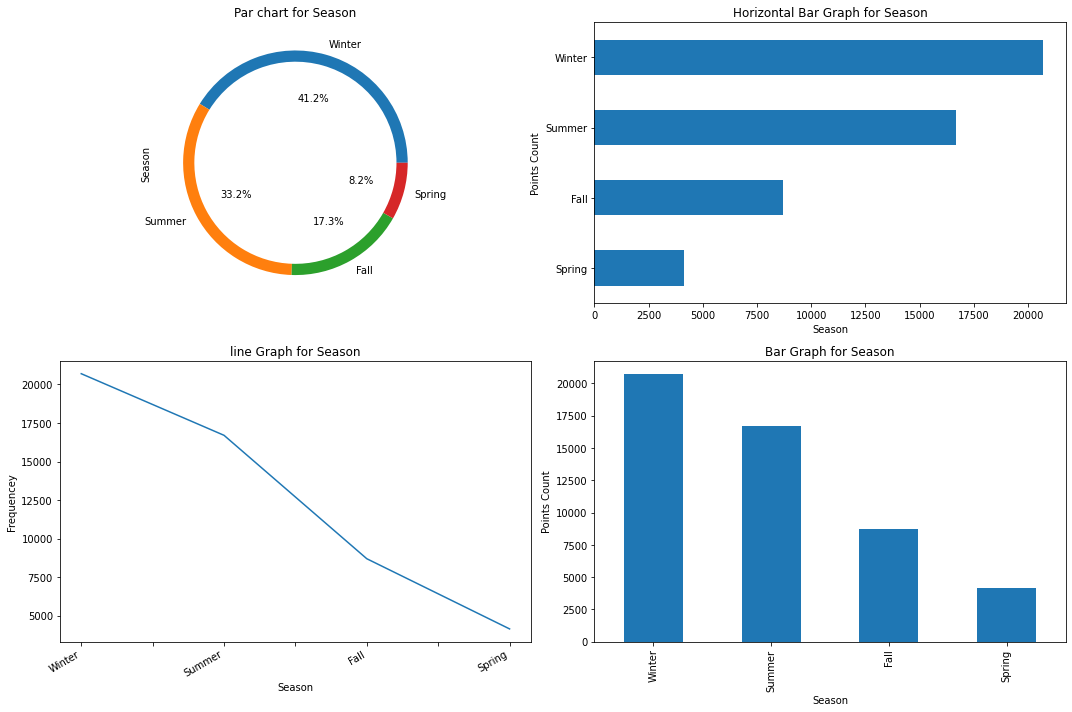

In [ ]:
'''
Create density and bar graphs for incident code Groups
'''

_, axes = plt.subplots(2,2, figsize=(15,10))

Date_Time_df['Season'].value_counts().plot(kind = 'pie' ,ax =axes[0][0]  ,autopct ='%1.1f%%',wedgeprops=dict(width=.1) ) ;

Date_Time_df['Season'].sort_index().value_counts().sort_values(axis = 0 , ascending=True).plot(kind = 'barh' , ax = axes[0][1])

Date_Time_df['Season'].value_counts().plot(ax =axes[1][0]) ;

Date_Time_df['Season'].sort_index().value_counts().sort_values(axis = 0 , ascending=False).plot(kind = 'bar' , ax = axes[1][1])

axes[0][0].set_title('Par chart for Season') ; 
axes[0][1].set_title('Horizontal Bar Graph for Season'); 
axes[1][0].set_title('line Graph for Season') ; 
axes[1][1].set_title('Bar Graph for Season') ; 




axes[0][1].set(xlabel="Season", ylabel="Points Count") ;
axes[1][0].set(xlabel="Season", ylabel="Frequencey") ;
axes[1][1].set(xlabel="Season", ylabel="Points Count") ;

plt.setp(axes[1][0].get_xticklabels(), rotation=30, horizontalalignment='right') ;


plt.tight_layout()





In [ ]:
dataset_x['Season'] = Date_Time_df['Season']

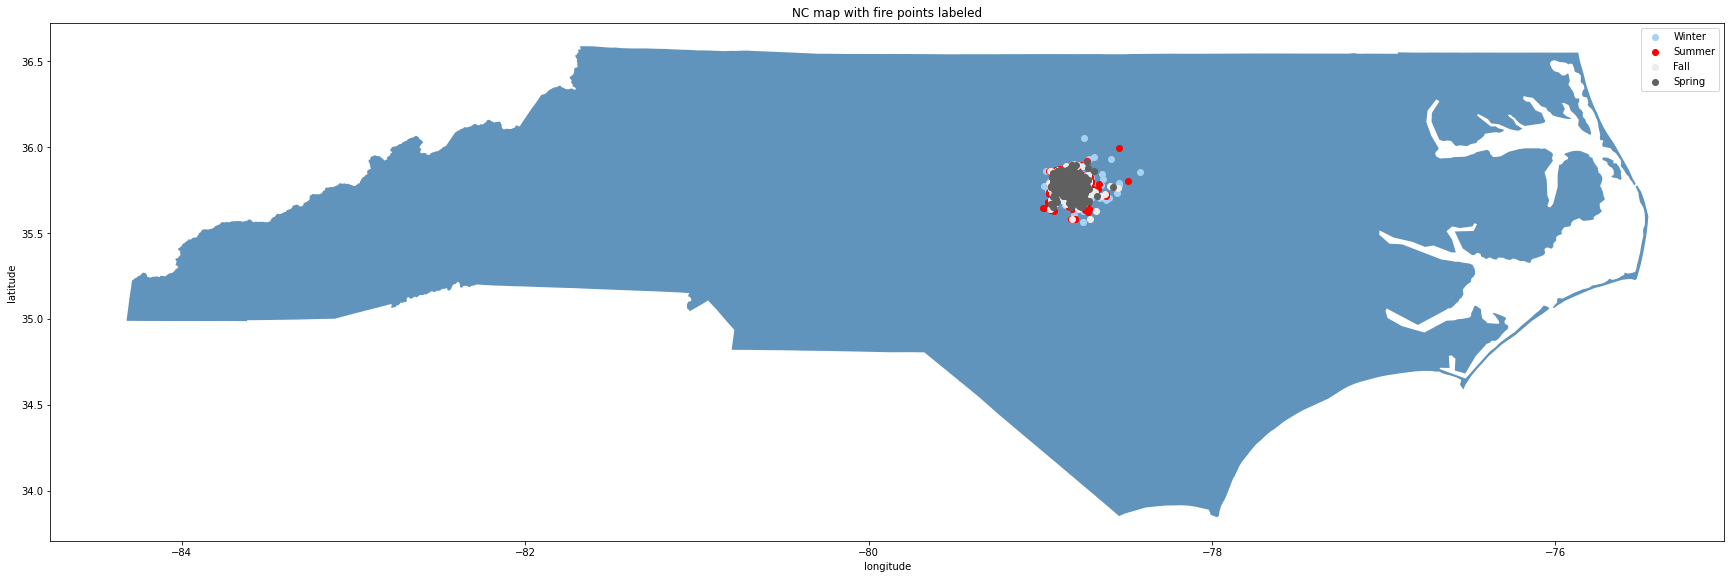

In [ ]:
# plotting the fire positions on top with red color 
fig, ax = plt.subplots(1, figsize=(30,20))
base = COUNTRY.plot(ax=ax ,color =  '#6194BC') ; 
dataset_x[dataset_x['Season']=='Winter'].plot(ax=base, color='#A5D1F3' , label = 'Winter');
dataset_x[dataset_x['Season']=='Summer'].plot(ax=base, color='red',label = 'Summer');
dataset_x[dataset_x['Season']=='Fall'].plot(ax=base, color='#ECECEC',label = 'Fall');
dataset_x[dataset_x['Season']=='Spring'].plot(ax=base, color='#606060',label = 'Spring');



ax.set(xlabel="longitude", ylabel="latitude") ; 
ax.set_title('NC map with fire points labeled') ; 
ax.legend();


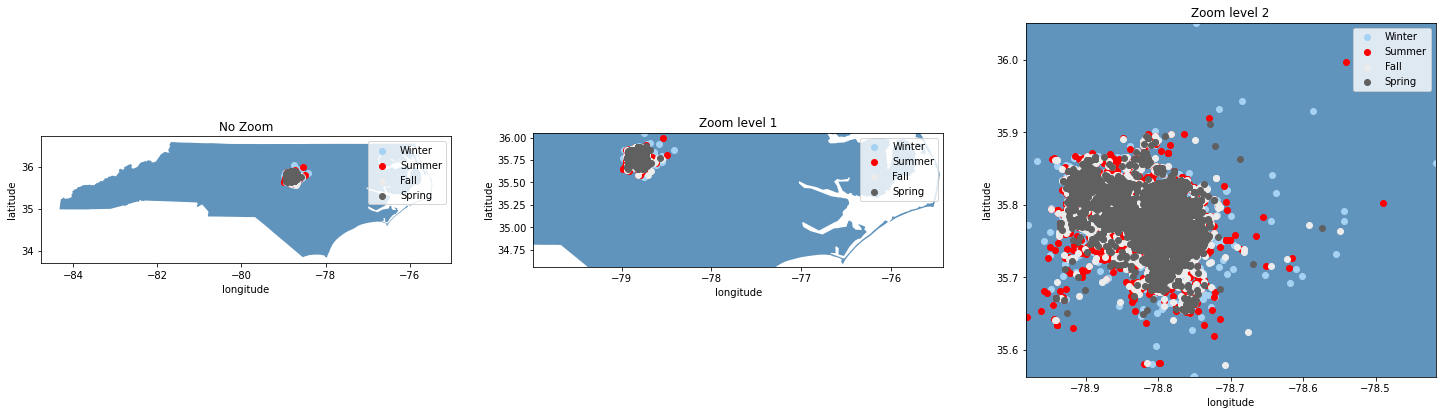

In [ ]:
'''
Create subplots with different Zoom levels to see the points from near positions
'''

_, axes = plt.subplots(1,3, figsize=(25,15))

base = COUNTRY.plot(ax=axes[1],color = '#6194BC') ; 

base_1 = COUNTRY.plot(ax=axes[0],color = '#6194BC') ; 
base_2 = COUNTRY.plot(ax=axes[2] , color = '#6194BC') ; 




dataset_x[dataset_x['Season']=='Winter'].plot(ax=base_1, color='#A5D1F3' , label = 'Winter');
dataset_x[dataset_x['Season']=='Summer'].plot(ax=base_1, color='red' , label = 'Summer');
dataset_x[dataset_x['Season']=='Fall'].plot(ax=base_1, color='#ECECEC' , label = 'Fall');
dataset_x[dataset_x['Season']=='Spring'].plot(ax=base_1, color='#606060' , label = 'Spring');

axes[0].set(xlabel="longitude", ylabel="latitude") ;

dataset_x[dataset_x['Season']=='Winter'].plot(ax=base, color='#A5D1F3' , label = 'Winter');
dataset_x[dataset_x['Season']=='Summer'].plot(ax=base, color='red' , label = 'Summer');
dataset_x[dataset_x['Season']=='Fall'].plot(ax=base, color='#ECECEC' , label = 'Fall');
dataset_x[dataset_x['Season']=='Spring'].plot(ax=base, color='#606060' , label = 'Spring');



axes[1].axis([dataset['longitude'].min() -1 ,dataset['longitude'].max() + 3 , 
              dataset['latitude'].min() - 1,dataset['latitude'].max() ]) ; 

axes[1].set(xlabel="longitude", ylabel="latitude") ; 


dataset_x[dataset_x['Season']=='Winter'].plot(ax=base_2, color='#A5D1F3' , label = 'Winter');
dataset_x[dataset_x['Season']=='Summer'].plot(ax=base_2, color='red' , label = 'Summer');
dataset_x[dataset_x['Season']=='Fall'].plot(ax=base_2, color='#ECECEC' , label = 'Fall');
dataset_x[dataset_x['Season']=='Spring'].plot(ax=base_2, color='#606060' , label = 'Spring');

axes[2].axis([dataset['longitude'].min()  ,dataset['longitude'].max() , 
              dataset['latitude'].min() ,dataset['latitude'].max() ]) ;
axes[2].set(xlabel="longitude", ylabel="latitude") ;

axes[0].set_title('No Zoom')
axes[1].set_title('Zoom level 1')
axes[2].set_title('Zoom level 2')

axes[0].legend()
axes[1].legend()
axes[2].legend()

plt.legend()